In [14]:
import pandas as pd

data=pd.read_csv('case1.txt','\t')

data.shape

(1856, 38)

In [13]:
import pandas as pd
from scipy.stats import pearsonr
row=[data,data1,data2,data3,data4,data5,data6]
for x in row:
    x.corrwith(data1.target)#,data2.target,data3.target,data4.target,data5.target,data6.target])
    
    

NameError: name 'data1' is not defined

In [17]:
data.dropna(inplace=True)
pd.options.display.max_columns = None
data.head()

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,info_sector,info_financial_goals,fins_revenues_m1,fins_revenues_sincefound,fins_profit_m1,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age,Average Team Age Grouping,found_name1_gender,found_name2_gender,found_name3_gender,found_name1_born,found_name2_born,found_name3_born,found_name1_resides,found_name2_resides,found_name3_resides,found_name1_education,found_name2_education,found_name3_education
4,2016,0.0,0.0,0.0,Rwanda,Rwanda,Sub-Saharan Africa,0,2015.0,For-profit company,Energy,Cover costs and earn some profit,500.0,1000.0,6% - 10%,3,0,1.0,1.0,1.0,0.0,20.0,21.0,21.0,20.666667,19-25,F,F,F,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Bachelors degree / Honours degree
11,2016,0.0,0.0,0.0,Uganda,Uganda,Sub-Saharan Africa,0,2015.0,For-profit company,Supply chain services,Cover costs and earn some profit,61.0,61.0,6% - 10%,3,0,1.0,1.0,1.0,7.0,24.0,22.0,18.0,21.333333,19-25,F,F,F,Democratic Republic of the Congo,Democratic Republic of the Congo,Democratic Republic of the Congo,Uganda,Uganda,Uganda,Technical/Vocational degree,Technical/Vocational degree,High school
14,2016,0.0,0.0,0.0,Nigeria,Nigeria,Sub-Saharan Africa,1,2015.0,For-profit company,Other,Cover costs and earn some profit,4000.0,12000.0,6% - 10%,2,0,1.0,1.0,1.0,0.0,21.0,21.0,23.0,21.666667,19-25,M,F,M,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Technical/Vocational degree
15,2016,0.0,0.0,0.0,Benin,Benin,Sub-Saharan Africa,0,2014.0,For-profit company,Agriculture,Cover costs and earn some profit,9700.0,14500.0,More than 20%,10,22,1.0,1.0,1.0,2.0,23.0,23.0,20.0,22.000000,19-25,M,F,F,Benin,Benin,Benin,Benin,Benin,Benin,Bachelors degree / Honours degree,Bachelors degree / Honours degree,High school
18,2016,0.0,0.0,0.0,United States of America,United States of America,North America,1,2014.0,For-profit company,Health,Cover costs and earn some profit,25000.0,25000.0,Negative ROI (venture lost money in year prior),3,0,1.0,1.0,1.0,0.0,22.0,22.0,22.0,22.000000,19-25,M,M,M,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Associate Degree


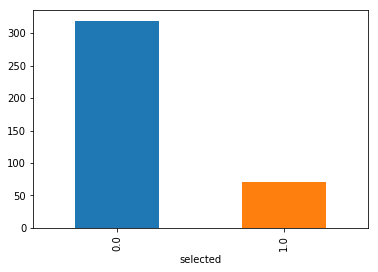

In [22]:
data.groupby('selected').showup.count().plot(kind='bar',ylim=0)


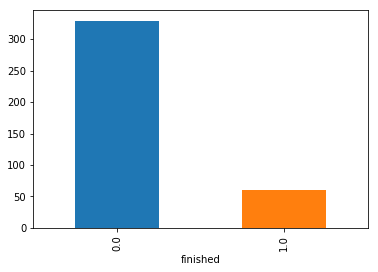

In [26]:
data.groupby('finished').showup.count().plot(kind='bar',ylim=0)

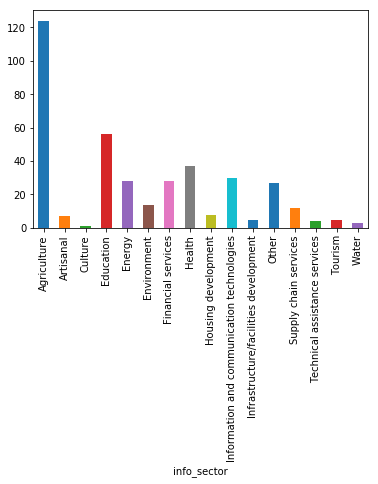

In [27]:
data.groupby('info_sector').finished.count().plot(kind='bar',ylim=0)

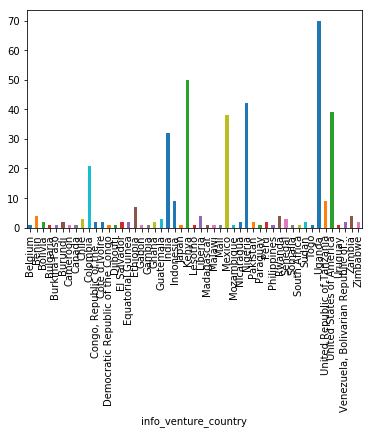

In [30]:
data.groupby('info_venture_country').finished.count().plot(kind='bar',ylim=0)

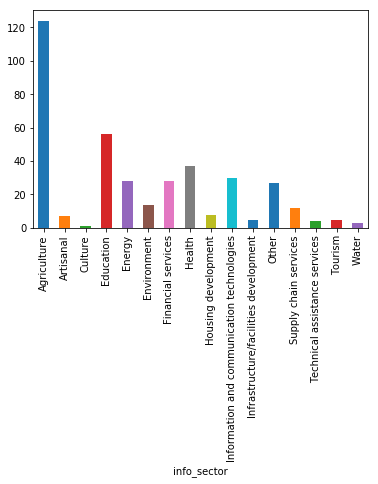

In [33]:
data.groupby('info_sector').info_venture_country.count().plot(kind='bar',ylim=0)

In [ ]:
from matplotlib import pyplot as plt


In [2]:
t0=data[data.target ==0]




In [3]:
from catboost import Pool, CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier as bc
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier as XGB

In [4]:
from sklearn.model_selection import train_test_split as tts

xTrain,xTest,yTrain,yTest=tts(X,y,stratify=y,test_size=0.33,random_state=42)


from sklearn.preprocessing import StandardScaler as ss
scalar=ss()
xTrainS=scalar.fit(xTrain).fit_transform(xTrain)
xTestS=scalar.fit(xTest).fit_transform(xTest)

In [5]:
from sklearn.linear_model import LogisticRegression as lr

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [6]:
# Ensemble Voting
ada=AdaBoostClassifier(algorithm='SAMME.R',n_estimators=300, base_estimator=lr(verbose=0,penalty='l2',random_state=42),learning_rate=0.01,random_state=42)
ada.fit(xTrainS,yTrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.01, n_estimators=300, random_state=42)

In [7]:
Bag=bc(n_estimators=100,base_estimator=lr(C=1.0, class_weight=None, dual=False, penalty='l2', random_state=42), random_state=42)
Bag.fit(xTrainS,yTrain)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [6]:
xgb=XGB(n_estimators=500,booster='gbtree',learning_rate=0.1)
xgb.fit(xTrainS,yTrain)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[[0.50707394 0.49292606]
 [0.7632542  0.23674579]
 [0.6631545  0.33684552]
 ...
 [0.79318964 0.20681038]
 [0.84801286 0.15198714]
 [0.4681703  0.5318297 ]]


In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [7]:
predict=xgb.predict_proba(xTestS)


# keep probabilities for the positive outcome only
probs = predict[:, 1]

# calculate AUC
auc = roc_auc_score(yTest, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)

AUC: 0.880


In [63]:
cat=CatBoostClassifier(iterations=2000,bagging_temperature = 0.2, depth=2,learning_rate=0.1, loss_function='Logloss',logging_level='Verbose', eval_metric='AUC',use_best_model=True,random_seed=42)
cat.fit(xTrainS,yTrain,eval_set=(xTestS,yTest))

0:	test: 0.5846047	best: 0.5846047 (0)	total: 239ms	remaining: 7m 58s
1:	test: 0.6199194	best: 0.6199194 (1)	total: 425ms	remaining: 7m 4s
2:	test: 0.6265115	best: 0.6265115 (2)	total: 625ms	remaining: 6m 56s
3:	test: 0.6311593	best: 0.6311593 (3)	total: 832ms	remaining: 6m 55s
4:	test: 0.6510657	best: 0.6510657 (4)	total: 1.04s	remaining: 6m 56s
5:	test: 0.6547369	best: 0.6547369 (5)	total: 1.25s	remaining: 6m 56s
6:	test: 0.6606231	best: 0.6606231 (6)	total: 1.46s	remaining: 6m 55s
7:	test: 0.6604376	best: 0.6606231 (6)	total: 1.65s	remaining: 6m 51s
8:	test: 0.6708454	best: 0.6708454 (8)	total: 1.86s	remaining: 6m 51s
9:	test: 0.6785029	best: 0.6785029 (9)	total: 2.04s	remaining: 6m 46s
10:	test: 0.6884011	best: 0.6884011 (10)	total: 2.32s	remaining: 7m
11:	test: 0.6860271	best: 0.6884011 (10)	total: 2.51s	remaining: 6m 56s
12:	test: 0.6913809	best: 0.6913809 (12)	total: 2.72s	remaining: 6m 55s
13:	test: 0.6992099	best: 0.6992099 (13)	total: 3.04s	remaining: 7m 11s
14:	test: 0.70433

115:	test: 0.8186840	best: 0.8186840 (115)	total: 24s	remaining: 6m 30s
116:	test: 0.8190334	best: 0.8190334 (116)	total: 24.2s	remaining: 6m 30s
117:	test: 0.8195433	best: 0.8195433 (117)	total: 24.4s	remaining: 6m 29s
118:	test: 0.8196475	best: 0.8196475 (118)	total: 24.6s	remaining: 6m 28s
119:	test: 0.8199591	best: 0.8199591 (119)	total: 24.8s	remaining: 6m 28s
120:	test: 0.8203659	best: 0.8203659 (120)	total: 25s	remaining: 6m 27s
121:	test: 0.8199083	best: 0.8203659 (120)	total: 25.1s	remaining: 6m 26s
122:	test: 0.8202226	best: 0.8203659 (120)	total: 25.3s	remaining: 6m 26s
123:	test: 0.8207386	best: 0.8207386 (123)	total: 25.5s	remaining: 6m 25s
124:	test: 0.8212250	best: 0.8212250 (124)	total: 25.7s	remaining: 6m 24s
125:	test: 0.8212019	best: 0.8212250 (124)	total: 25.8s	remaining: 6m 24s
126:	test: 0.8215093	best: 0.8215093 (126)	total: 26s	remaining: 6m 23s
127:	test: 0.8215884	best: 0.8215884 (127)	total: 26.2s	remaining: 6m 23s
128:	test: 0.8225686	best: 0.8225686 (128)	t

227:	test: 0.8469348	best: 0.8469348 (227)	total: 46.4s	remaining: 6m
228:	test: 0.8471779	best: 0.8471779 (228)	total: 46.6s	remaining: 6m
229:	test: 0.8472594	best: 0.8472594 (229)	total: 46.9s	remaining: 6m
230:	test: 0.8471784	best: 0.8472594 (229)	total: 47.1s	remaining: 6m
231:	test: 0.8473736	best: 0.8473736 (231)	total: 47.3s	remaining: 6m
232:	test: 0.8477065	best: 0.8477065 (232)	total: 47.5s	remaining: 6m
233:	test: 0.8477685	best: 0.8477685 (233)	total: 47.7s	remaining: 5m 59s
234:	test: 0.8481450	best: 0.8481450 (234)	total: 47.9s	remaining: 5m 59s
235:	test: 0.8482290	best: 0.8482290 (235)	total: 48s	remaining: 5m 59s
236:	test: 0.8481210	best: 0.8482290 (235)	total: 48.3s	remaining: 5m 59s
237:	test: 0.8479577	best: 0.8482290 (235)	total: 48.5s	remaining: 5m 58s
238:	test: 0.8481564	best: 0.8482290 (235)	total: 48.7s	remaining: 5m 58s
239:	test: 0.8485266	best: 0.8485266 (239)	total: 48.9s	remaining: 5m 58s
240:	test: 0.8487796	best: 0.8487796 (240)	total: 49.2s	remainin

339:	test: 0.8607881	best: 0.8607881 (339)	total: 1m 10s	remaining: 5m 45s
340:	test: 0.8607707	best: 0.8607881 (339)	total: 1m 11s	remaining: 5m 45s
341:	test: 0.8608559	best: 0.8608559 (341)	total: 1m 11s	remaining: 5m 45s
342:	test: 0.8609715	best: 0.8609715 (342)	total: 1m 11s	remaining: 5m 45s
343:	test: 0.8611581	best: 0.8611581 (343)	total: 1m 11s	remaining: 5m 45s
344:	test: 0.8613909	best: 0.8613909 (344)	total: 1m 11s	remaining: 5m 45s
345:	test: 0.8615574	best: 0.8615574 (345)	total: 1m 12s	remaining: 5m 45s
346:	test: 0.8616502	best: 0.8616502 (346)	total: 1m 12s	remaining: 5m 45s
347:	test: 0.8617591	best: 0.8617591 (347)	total: 1m 12s	remaining: 5m 44s
348:	test: 0.8619118	best: 0.8619118 (348)	total: 1m 12s	remaining: 5m 44s
349:	test: 0.8619512	best: 0.8619512 (349)	total: 1m 13s	remaining: 5m 44s
350:	test: 0.8621326	best: 0.8621326 (350)	total: 1m 13s	remaining: 5m 43s
351:	test: 0.8621348	best: 0.8621348 (351)	total: 1m 13s	remaining: 5m 43s
352:	test: 0.8621659	best

449:	test: 0.8693835	best: 0.8693965 (448)	total: 1m 35s	remaining: 5m 29s
450:	test: 0.8694912	best: 0.8694912 (450)	total: 1m 35s	remaining: 5m 28s
451:	test: 0.8695563	best: 0.8695563 (451)	total: 1m 36s	remaining: 5m 28s
452:	test: 0.8696882	best: 0.8696882 (452)	total: 1m 36s	remaining: 5m 29s
453:	test: 0.8696973	best: 0.8696973 (453)	total: 1m 36s	remaining: 5m 28s
454:	test: 0.8697357	best: 0.8697357 (454)	total: 1m 36s	remaining: 5m 28s
455:	test: 0.8697938	best: 0.8697938 (455)	total: 1m 37s	remaining: 5m 28s
456:	test: 0.8697807	best: 0.8697938 (455)	total: 1m 37s	remaining: 5m 28s
457:	test: 0.8698887	best: 0.8698887 (457)	total: 1m 37s	remaining: 5m 29s
458:	test: 0.8699513	best: 0.8699513 (458)	total: 1m 38s	remaining: 5m 29s
459:	test: 0.8699567	best: 0.8699567 (459)	total: 1m 38s	remaining: 5m 28s
460:	test: 0.8699135	best: 0.8699567 (459)	total: 1m 38s	remaining: 5m 28s
461:	test: 0.8700605	best: 0.8700605 (461)	total: 1m 38s	remaining: 5m 28s
462:	test: 0.8702092	best

559:	test: 0.8749775	best: 0.8749835 (557)	total: 2m	remaining: 5m 10s
560:	test: 0.8749550	best: 0.8749835 (557)	total: 2m	remaining: 5m 10s
561:	test: 0.8749495	best: 0.8749835 (557)	total: 2m 1s	remaining: 5m 10s
562:	test: 0.8749841	best: 0.8749841 (562)	total: 2m 1s	remaining: 5m 9s
563:	test: 0.8750161	best: 0.8750161 (563)	total: 2m 1s	remaining: 5m 9s
564:	test: 0.8750522	best: 0.8750522 (564)	total: 2m 1s	remaining: 5m 9s
565:	test: 0.8750736	best: 0.8750736 (565)	total: 2m 2s	remaining: 5m 9s
566:	test: 0.8751479	best: 0.8751479 (566)	total: 2m 2s	remaining: 5m 9s
567:	test: 0.8752363	best: 0.8752363 (567)	total: 2m 2s	remaining: 5m 8s
568:	test: 0.8753686	best: 0.8753686 (568)	total: 2m 2s	remaining: 5m 9s
569:	test: 0.8754696	best: 0.8754696 (569)	total: 2m 3s	remaining: 5m 9s
570:	test: 0.8755344	best: 0.8755344 (570)	total: 2m 3s	remaining: 5m 8s
571:	test: 0.8755624	best: 0.8755624 (571)	total: 2m 3s	remaining: 5m 8s
572:	test: 0.8755324	best: 0.8755624 (571)	total: 2m 3

670:	test: 0.8789894	best: 0.8789894 (670)	total: 2m 28s	remaining: 4m 53s
671:	test: 0.8790835	best: 0.8790835 (671)	total: 2m 28s	remaining: 4m 53s
672:	test: 0.8791006	best: 0.8791006 (672)	total: 2m 28s	remaining: 4m 53s
673:	test: 0.8791479	best: 0.8791479 (673)	total: 2m 29s	remaining: 4m 53s
674:	test: 0.8791916	best: 0.8791916 (674)	total: 2m 29s	remaining: 4m 52s
675:	test: 0.8791725	best: 0.8791916 (674)	total: 2m 29s	remaining: 4m 52s
676:	test: 0.8792239	best: 0.8792239 (676)	total: 2m 29s	remaining: 4m 52s
677:	test: 0.8792455	best: 0.8792455 (677)	total: 2m 29s	remaining: 4m 52s
678:	test: 0.8792335	best: 0.8792455 (677)	total: 2m 30s	remaining: 4m 52s
679:	test: 0.8792723	best: 0.8792723 (679)	total: 2m 30s	remaining: 4m 52s
680:	test: 0.8793441	best: 0.8793441 (680)	total: 2m 30s	remaining: 4m 51s
681:	test: 0.8794331	best: 0.8794331 (681)	total: 2m 30s	remaining: 4m 51s
682:	test: 0.8795155	best: 0.8795155 (682)	total: 2m 31s	remaining: 4m 51s
683:	test: 0.8795751	best

780:	test: 0.8819573	best: 0.8819573 (780)	total: 2m 56s	remaining: 4m 35s
781:	test: 0.8819643	best: 0.8819643 (781)	total: 2m 56s	remaining: 4m 34s
782:	test: 0.8819878	best: 0.8819878 (782)	total: 2m 56s	remaining: 4m 34s
783:	test: 0.8819865	best: 0.8819878 (782)	total: 2m 56s	remaining: 4m 34s
784:	test: 0.8820491	best: 0.8820491 (784)	total: 2m 57s	remaining: 4m 34s
785:	test: 0.8820861	best: 0.8820861 (785)	total: 2m 57s	remaining: 4m 33s
786:	test: 0.8821331	best: 0.8821331 (786)	total: 2m 57s	remaining: 4m 33s
787:	test: 0.8821957	best: 0.8821957 (787)	total: 2m 57s	remaining: 4m 33s
788:	test: 0.8821463	best: 0.8821957 (787)	total: 2m 57s	remaining: 4m 33s
789:	test: 0.8822011	best: 0.8822011 (789)	total: 2m 58s	remaining: 4m 32s
790:	test: 0.8822413	best: 0.8822413 (790)	total: 2m 58s	remaining: 4m 32s
791:	test: 0.8822740	best: 0.8822740 (791)	total: 2m 58s	remaining: 4m 32s
792:	test: 0.8822922	best: 0.8822922 (792)	total: 2m 58s	remaining: 4m 32s
793:	test: 0.8823422	best

890:	test: 0.8839691	best: 0.8839691 (890)	total: 3m 23s	remaining: 4m 13s
891:	test: 0.8839317	best: 0.8839691 (890)	total: 3m 23s	remaining: 4m 13s
892:	test: 0.8839652	best: 0.8839691 (890)	total: 3m 24s	remaining: 4m 12s
893:	test: 0.8839867	best: 0.8839867 (893)	total: 3m 24s	remaining: 4m 12s
894:	test: 0.8840074	best: 0.8840074 (894)	total: 3m 24s	remaining: 4m 12s
895:	test: 0.8840431	best: 0.8840431 (895)	total: 3m 24s	remaining: 4m 12s
896:	test: 0.8840761	best: 0.8840761 (896)	total: 3m 25s	remaining: 4m 12s
897:	test: 0.8840823	best: 0.8840823 (897)	total: 3m 25s	remaining: 4m 11s
898:	test: 0.8841137	best: 0.8841137 (898)	total: 3m 25s	remaining: 4m 11s
899:	test: 0.8841230	best: 0.8841230 (899)	total: 3m 25s	remaining: 4m 11s
900:	test: 0.8841135	best: 0.8841230 (899)	total: 3m 26s	remaining: 4m 11s
901:	test: 0.8841195	best: 0.8841230 (899)	total: 3m 26s	remaining: 4m 11s
902:	test: 0.8841695	best: 0.8841695 (902)	total: 3m 26s	remaining: 4m 10s
903:	test: 0.8842071	best

1001:	test: 0.8855058	best: 0.8855058 (1001)	total: 3m 52s	remaining: 3m 51s
1002:	test: 0.8855326	best: 0.8855326 (1002)	total: 3m 52s	remaining: 3m 51s
1003:	test: 0.8855863	best: 0.8855863 (1003)	total: 3m 52s	remaining: 3m 50s
1004:	test: 0.8855672	best: 0.8855863 (1003)	total: 3m 52s	remaining: 3m 50s
1005:	test: 0.8855676	best: 0.8855863 (1003)	total: 3m 53s	remaining: 3m 50s
1006:	test: 0.8855838	best: 0.8855863 (1003)	total: 3m 53s	remaining: 3m 50s
1007:	test: 0.8855781	best: 0.8855863 (1003)	total: 3m 53s	remaining: 3m 49s
1008:	test: 0.8856181	best: 0.8856181 (1008)	total: 3m 53s	remaining: 3m 49s
1009:	test: 0.8856324	best: 0.8856324 (1009)	total: 3m 53s	remaining: 3m 49s
1010:	test: 0.8856612	best: 0.8856612 (1010)	total: 3m 54s	remaining: 3m 49s
1011:	test: 0.8856996	best: 0.8856996 (1011)	total: 3m 54s	remaining: 3m 48s
1012:	test: 0.8857032	best: 0.8857032 (1012)	total: 3m 54s	remaining: 3m 48s
1013:	test: 0.8857332	best: 0.8857332 (1013)	total: 3m 54s	remaining: 3m 48s

1109:	test: 0.8869115	best: 0.8869115 (1109)	total: 4m 17s	remaining: 3m 26s
1110:	test: 0.8869257	best: 0.8869257 (1110)	total: 4m 17s	remaining: 3m 26s
1111:	test: 0.8869565	best: 0.8869565 (1111)	total: 4m 17s	remaining: 3m 25s
1112:	test: 0.8869877	best: 0.8869877 (1112)	total: 4m 17s	remaining: 3m 25s
1113:	test: 0.8869827	best: 0.8869877 (1112)	total: 4m 18s	remaining: 3m 25s
1114:	test: 0.8870325	best: 0.8870325 (1114)	total: 4m 18s	remaining: 3m 25s
1115:	test: 0.8870535	best: 0.8870535 (1115)	total: 4m 18s	remaining: 3m 24s
1116:	test: 0.8870959	best: 0.8870959 (1116)	total: 4m 18s	remaining: 3m 24s
1117:	test: 0.8870805	best: 0.8870959 (1116)	total: 4m 19s	remaining: 3m 24s
1118:	test: 0.8871323	best: 0.8871323 (1118)	total: 4m 19s	remaining: 3m 24s
1119:	test: 0.8871223	best: 0.8871323 (1118)	total: 4m 19s	remaining: 3m 23s
1120:	test: 0.8871394	best: 0.8871394 (1120)	total: 4m 19s	remaining: 3m 23s
1121:	test: 0.8871560	best: 0.8871560 (1121)	total: 4m 19s	remaining: 3m 23s

1216:	test: 0.8879536	best: 0.8879536 (1216)	total: 4m 41s	remaining: 3m 1s
1217:	test: 0.8879518	best: 0.8879536 (1216)	total: 4m 41s	remaining: 3m
1218:	test: 0.8879864	best: 0.8879864 (1218)	total: 4m 42s	remaining: 3m
1219:	test: 0.8879754	best: 0.8879864 (1218)	total: 4m 42s	remaining: 3m
1220:	test: 0.8879829	best: 0.8879864 (1218)	total: 4m 42s	remaining: 3m
1221:	test: 0.8879877	best: 0.8879877 (1221)	total: 4m 42s	remaining: 2m 59s
1222:	test: 0.8879887	best: 0.8879887 (1222)	total: 4m 42s	remaining: 2m 59s
1223:	test: 0.8879656	best: 0.8879887 (1222)	total: 4m 43s	remaining: 2m 59s
1224:	test: 0.8879367	best: 0.8879887 (1222)	total: 4m 43s	remaining: 2m 59s
1225:	test: 0.8879635	best: 0.8879887 (1222)	total: 4m 43s	remaining: 2m 59s
1226:	test: 0.8879970	best: 0.8879970 (1226)	total: 4m 43s	remaining: 2m 58s
1227:	test: 0.8879766	best: 0.8879970 (1226)	total: 4m 44s	remaining: 2m 58s
1228:	test: 0.8879583	best: 0.8879970 (1226)	total: 4m 44s	remaining: 2m 58s
1229:	test: 0.88

1324:	test: 0.8889470	best: 0.8889574 (1322)	total: 5m 9s	remaining: 2m 37s
1325:	test: 0.8889308	best: 0.8889574 (1322)	total: 5m 9s	remaining: 2m 37s
1326:	test: 0.8889449	best: 0.8889574 (1322)	total: 5m 9s	remaining: 2m 37s
1327:	test: 0.8889442	best: 0.8889574 (1322)	total: 5m 9s	remaining: 2m 36s
1328:	test: 0.8889589	best: 0.8889589 (1328)	total: 5m 10s	remaining: 2m 36s
1329:	test: 0.8889633	best: 0.8889633 (1329)	total: 5m 10s	remaining: 2m 36s
1330:	test: 0.8889674	best: 0.8889674 (1330)	total: 5m 10s	remaining: 2m 36s
1331:	test: 0.8889638	best: 0.8889674 (1330)	total: 5m 10s	remaining: 2m 35s
1332:	test: 0.8889571	best: 0.8889674 (1330)	total: 5m 11s	remaining: 2m 35s
1333:	test: 0.8889479	best: 0.8889674 (1330)	total: 5m 11s	remaining: 2m 35s
1334:	test: 0.8889750	best: 0.8889750 (1334)	total: 5m 11s	remaining: 2m 35s
1335:	test: 0.8889668	best: 0.8889750 (1334)	total: 5m 11s	remaining: 2m 34s
1336:	test: 0.8889864	best: 0.8889864 (1336)	total: 5m 12s	remaining: 2m 34s
133

1431:	test: 0.8893554	best: 0.8893554 (1431)	total: 5m 34s	remaining: 2m 12s
1432:	test: 0.8893672	best: 0.8893672 (1432)	total: 5m 34s	remaining: 2m 12s
1433:	test: 0.8893753	best: 0.8893753 (1433)	total: 5m 34s	remaining: 2m 12s
1434:	test: 0.8893913	best: 0.8893913 (1434)	total: 5m 35s	remaining: 2m 11s
1435:	test: 0.8893819	best: 0.8893913 (1434)	total: 5m 35s	remaining: 2m 11s
1436:	test: 0.8893877	best: 0.8893913 (1434)	total: 5m 35s	remaining: 2m 11s
1437:	test: 0.8893962	best: 0.8893962 (1437)	total: 5m 35s	remaining: 2m 11s
1438:	test: 0.8894009	best: 0.8894009 (1438)	total: 5m 36s	remaining: 2m 11s
1439:	test: 0.8894017	best: 0.8894017 (1439)	total: 5m 36s	remaining: 2m 10s
1440:	test: 0.8894167	best: 0.8894167 (1440)	total: 5m 36s	remaining: 2m 10s
1441:	test: 0.8894234	best: 0.8894234 (1441)	total: 5m 36s	remaining: 2m 10s
1442:	test: 0.8894405	best: 0.8894405 (1442)	total: 5m 37s	remaining: 2m 10s
1443:	test: 0.8894418	best: 0.8894418 (1443)	total: 5m 37s	remaining: 2m 9s


1539:	test: 0.8897606	best: 0.8897786 (1536)	total: 6m 1s	remaining: 1m 48s
1540:	test: 0.8897684	best: 0.8897786 (1536)	total: 6m 1s	remaining: 1m 47s
1541:	test: 0.8897556	best: 0.8897786 (1536)	total: 6m 2s	remaining: 1m 47s
1542:	test: 0.8897609	best: 0.8897786 (1536)	total: 6m 2s	remaining: 1m 47s
1543:	test: 0.8897729	best: 0.8897786 (1536)	total: 6m 2s	remaining: 1m 47s
1544:	test: 0.8897770	best: 0.8897786 (1536)	total: 6m 2s	remaining: 1m 46s
1545:	test: 0.8898035	best: 0.8898035 (1545)	total: 6m 3s	remaining: 1m 46s
1546:	test: 0.8898176	best: 0.8898176 (1546)	total: 6m 3s	remaining: 1m 46s
1547:	test: 0.8898222	best: 0.8898222 (1547)	total: 6m 3s	remaining: 1m 46s
1548:	test: 0.8898400	best: 0.8898400 (1548)	total: 6m 3s	remaining: 1m 45s
1549:	test: 0.8898209	best: 0.8898400 (1548)	total: 6m 4s	remaining: 1m 45s
1550:	test: 0.8898239	best: 0.8898400 (1548)	total: 6m 4s	remaining: 1m 45s
1551:	test: 0.8898225	best: 0.8898400 (1548)	total: 6m 4s	remaining: 1m 45s
1552:	test: 

1646:	test: 0.8900956	best: 0.8900956 (1646)	total: 6m 33s	remaining: 1m 24s
1647:	test: 0.8900908	best: 0.8900956 (1646)	total: 6m 34s	remaining: 1m 24s
1648:	test: 0.8900839	best: 0.8900956 (1646)	total: 6m 34s	remaining: 1m 24s
1649:	test: 0.8900583	best: 0.8900956 (1646)	total: 6m 35s	remaining: 1m 23s
1650:	test: 0.8900571	best: 0.8900956 (1646)	total: 6m 35s	remaining: 1m 23s
1651:	test: 0.8900327	best: 0.8900956 (1646)	total: 6m 35s	remaining: 1m 23s
1652:	test: 0.8900459	best: 0.8900956 (1646)	total: 6m 35s	remaining: 1m 23s
1653:	test: 0.8900378	best: 0.8900956 (1646)	total: 6m 36s	remaining: 1m 22s
1654:	test: 0.8900394	best: 0.8900956 (1646)	total: 6m 36s	remaining: 1m 22s
1655:	test: 0.8900401	best: 0.8900956 (1646)	total: 6m 36s	remaining: 1m 22s
1656:	test: 0.8900434	best: 0.8900956 (1646)	total: 6m 36s	remaining: 1m 22s
1657:	test: 0.8900385	best: 0.8900956 (1646)	total: 6m 37s	remaining: 1m 21s
1658:	test: 0.8900530	best: 0.8900956 (1646)	total: 6m 37s	remaining: 1m 21s

1754:	test: 0.8902944	best: 0.8902955 (1753)	total: 7m 6s	remaining: 59.6s
1755:	test: 0.8903069	best: 0.8903069 (1755)	total: 7m 7s	remaining: 59.3s
1756:	test: 0.8903157	best: 0.8903157 (1756)	total: 7m 7s	remaining: 59.1s
1757:	test: 0.8903311	best: 0.8903311 (1757)	total: 7m 7s	remaining: 58.9s
1758:	test: 0.8903302	best: 0.8903311 (1757)	total: 7m 8s	remaining: 58.6s
1759:	test: 0.8903375	best: 0.8903375 (1759)	total: 7m 8s	remaining: 58.4s
1760:	test: 0.8903472	best: 0.8903472 (1760)	total: 7m 8s	remaining: 58.2s
1761:	test: 0.8903375	best: 0.8903472 (1760)	total: 7m 9s	remaining: 58s
1762:	test: 0.8903540	best: 0.8903540 (1762)	total: 7m 10s	remaining: 57.8s
1763:	test: 0.8903586	best: 0.8903586 (1763)	total: 7m 10s	remaining: 57.6s
1764:	test: 0.8903441	best: 0.8903586 (1763)	total: 7m 10s	remaining: 57.3s
1765:	test: 0.8903626	best: 0.8903626 (1765)	total: 7m 10s	remaining: 57.1s
1766:	test: 0.8903738	best: 0.8903738 (1766)	total: 7m 11s	remaining: 56.8s
1767:	test: 0.8903809	

1863:	test: 0.8906947	best: 0.8906955 (1862)	total: 7m 33s	remaining: 33.1s
1864:	test: 0.8907023	best: 0.8907023 (1864)	total: 7m 33s	remaining: 32.9s
1865:	test: 0.8907296	best: 0.8907296 (1865)	total: 7m 34s	remaining: 32.6s
1866:	test: 0.8907147	best: 0.8907296 (1865)	total: 7m 34s	remaining: 32.4s
1867:	test: 0.8907127	best: 0.8907296 (1865)	total: 7m 34s	remaining: 32.1s
1868:	test: 0.8907171	best: 0.8907296 (1865)	total: 7m 34s	remaining: 31.9s
1869:	test: 0.8907206	best: 0.8907296 (1865)	total: 7m 34s	remaining: 31.6s
1870:	test: 0.8907195	best: 0.8907296 (1865)	total: 7m 35s	remaining: 31.4s
1871:	test: 0.8906887	best: 0.8907296 (1865)	total: 7m 35s	remaining: 31.1s
1872:	test: 0.8906631	best: 0.8907296 (1865)	total: 7m 35s	remaining: 30.9s
1873:	test: 0.8906983	best: 0.8907296 (1865)	total: 7m 36s	remaining: 30.7s
1874:	test: 0.8907009	best: 0.8907296 (1865)	total: 7m 36s	remaining: 30.4s
1875:	test: 0.8907051	best: 0.8907296 (1865)	total: 7m 36s	remaining: 30.2s
1876:	test: 

1972:	test: 0.8908689	best: 0.8908689 (1972)	total: 8m 3s	remaining: 6.61s
1973:	test: 0.8908572	best: 0.8908689 (1972)	total: 8m 3s	remaining: 6.37s
1974:	test: 0.8908553	best: 0.8908689 (1972)	total: 8m 3s	remaining: 6.12s
1975:	test: 0.8908550	best: 0.8908689 (1972)	total: 8m 4s	remaining: 5.88s
1976:	test: 0.8908473	best: 0.8908689 (1972)	total: 8m 4s	remaining: 5.63s
1977:	test: 0.8908442	best: 0.8908689 (1972)	total: 8m 4s	remaining: 5.39s
1978:	test: 0.8908470	best: 0.8908689 (1972)	total: 8m 4s	remaining: 5.14s
1979:	test: 0.8908582	best: 0.8908689 (1972)	total: 8m 5s	remaining: 4.9s
1980:	test: 0.8908527	best: 0.8908689 (1972)	total: 8m 5s	remaining: 4.65s
1981:	test: 0.8908408	best: 0.8908689 (1972)	total: 8m 5s	remaining: 4.41s
1982:	test: 0.8908432	best: 0.8908689 (1972)	total: 8m 5s	remaining: 4.16s
1983:	test: 0.8908331	best: 0.8908689 (1972)	total: 8m 5s	remaining: 3.92s
1984:	test: 0.8908512	best: 0.8908689 (1972)	total: 8m 6s	remaining: 3.67s
1985:	test: 0.8908395	best

TypeError: 'VotingClassifier' object does not support indexing

In [9]:
import lightgbm as lgb
train_data=lgb.Dataset(xTrainS,label=yTrain)
valid_data=lgb.Dataset(xTestS,label=yTest)

params = {'metric' : 'auc',
'boosting_type' : 'gbdt',
'colsample_bytree' : 0.9234,
'num_leaves' : 3,

'max_depth' : 2,#'xgboost_dart_mode':True,
'n_estimators' : 5235,
'min_child_samples': 399,
'min_child_weight': 0.1,
'reg_alpha': 0,
'reg_lambda': 0,
'subsample': 0.855,'verbose' : -1,
'num_threads' : 4
}


#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
train_data,
2500,
valid_sets=valid_data,
early_stopping_rounds= 500,
verbose_eval= 5
)


Training until validation scores don't improve for 500 rounds.
[5]	valid_0's auc: 0.631503
[10]	valid_0's auc: 0.667996
[15]	valid_0's auc: 0.693411
[20]	valid_0's auc: 0.70741
[25]	valid_0's auc: 0.724558
[30]	valid_0's auc: 0.739238
[35]	valid_0's auc: 0.746696
[40]	valid_0's auc: 0.756908
[45]	valid_0's auc: 0.765763
[50]	valid_0's auc: 0.771782
[55]	valid_0's auc: 0.778083
[60]	valid_0's auc: 0.780855
[65]	valid_0's auc: 0.785168
[70]	valid_0's auc: 0.789979
[75]	valid_0's auc: 0.792836
[80]	valid_0's auc: 0.796515
[85]	valid_0's auc: 0.800773
[90]	valid_0's auc: 0.804192
[95]	valid_0's auc: 0.807229
[100]	valid_0's auc: 0.808521
[105]	valid_0's auc: 0.810626
[110]	valid_0's auc: 0.813043
[115]	valid_0's auc: 0.816275
[120]	valid_0's auc: 0.818358
[125]	valid_0's auc: 0.820461
[130]	valid_0's auc: 0.821756
[135]	valid_0's auc: 0.823773
[140]	valid_0's auc: 0.824851
[145]	valid_0's auc: 0.826626
[150]	valid_0's auc: 0.828006
[155]	valid_0's auc: 0.830419
[160]	valid_0's auc: 0.83176

[1360]	valid_0's auc: 0.890221
[1365]	valid_0's auc: 0.890266
[1370]	valid_0's auc: 0.890325
[1375]	valid_0's auc: 0.890403
[1380]	valid_0's auc: 0.890403
[1385]	valid_0's auc: 0.89041
[1390]	valid_0's auc: 0.890462
[1395]	valid_0's auc: 0.890483
[1400]	valid_0's auc: 0.890486
[1405]	valid_0's auc: 0.890512
[1410]	valid_0's auc: 0.89053
[1415]	valid_0's auc: 0.890587
[1420]	valid_0's auc: 0.890594
[1425]	valid_0's auc: 0.890607
[1430]	valid_0's auc: 0.890632
[1435]	valid_0's auc: 0.890633
[1440]	valid_0's auc: 0.890665
[1445]	valid_0's auc: 0.890666
[1450]	valid_0's auc: 0.890704
[1455]	valid_0's auc: 0.890701
[1460]	valid_0's auc: 0.890734
[1465]	valid_0's auc: 0.890753
[1470]	valid_0's auc: 0.890755
[1475]	valid_0's auc: 0.890781
[1480]	valid_0's auc: 0.890766
[1485]	valid_0's auc: 0.89079
[1490]	valid_0's auc: 0.890804
[1495]	valid_0's auc: 0.890829
[1500]	valid_0's auc: 0.890818
[1505]	valid_0's auc: 0.890809
[1510]	valid_0's auc: 0.89086
[1515]	valid_0's auc: 0.890882
[1520]	valid

In [64]:
predict=ada.predict_proba(xTestS)
predict1=Bag.predict_proba(xTestS)
predict2=ada.predict_proba(xTestS)
predict3=cat.predict_proba(xTestS)
predict4=lgbm.predict(xTestS)
predict5=xgb.predict_proba(xTestS)

In [65]:
predict = predict[:, 1]
predict1 = predict1[:, 1]
predict2 = predict2[:, 1]
predict3 = predict3[:, 1]
predict5=predict5[:,1]
predict4 = predict4#[:, 1]

In [72]:
import numpy as np
p = np.mean([predict,predict1,predict2,predict3,predict4,predict5], axis=0)

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(yTest, p))

Average of decision tree ROC-AUC score: 0.890


In [57]:
import numpy as np
final= np.array([])
for i in range(len(xTestS)):
    final= np.append(final,max([predict[i], predict1[i],predict2[i],predict3[i], predict4[i]]))

IndexError: invalid index to scalar variable.

In [35]:
# Initialize 1st level estimators
estimators = [lr(),bc(n_estimators=100,base_estimator=lr(C=1.0, dual=False, penalty='l2', random_state=42), random_state=42),
             AdaBoostClassifier(algorithm='SAMME.R',n_estimators=300, base_estimator=lr(verbose=0,random_state=42),learning_rate=0.01,random_state=42),
             XGB(n_estimators=800,booster='gbtree',learning_rate=0.1),
             CatBoostClassifier(iterations=2000, depth=3,learning_rate=0.1, loss_function='Logloss',logging_level='Verbose', eval_metric='AUC',random_seed=42)]
              

In [36]:
# Initialize StackingTransformer
from vecstack import stacking



In [37]:
print(xTrainS.shape, yTrain.shape, xTestS.shape)

(40265, 200) (40265, 1) (19833, 200)


In [38]:
from sklearn.preprocessing import OneHotEncoder

def auc(y_true, y_pred):
    """ROC AUC metric for both binary and multiclass classification.
    
    Parameters
    ----------
    y_true : 1d numpy array
        True class labels
    y_pred : 2d numpy array
        Predicted probabilities for each class
    """
    ohe = OneHotEncoder(sparse=False)
    y_true = ohe.fit_transform(y_true.reshape(-1, 1))
    auc_score = roc_auc_score(y_true, y_pred)
    return auc_score

In [39]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import log_loss
# Get your stacked features
S_train,S_test=stacking(estimators,xTrainS, yTrain, xTestS,regression=False,needs_proba=True,metric=auc,n_folds=5,random_state=42,verbose=2)


task:         [classification]
n_classes:    [2]
metric:       [auc]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.86094690]
    fold  1:  [0.86042233]
    fold  2:  [0.85702733]
    fold  3:  [0.85882208]
    fold  4:  [0.85882673]
    ----
    MEAN:     [0.85920908] + [0.00138188]
    FULL:     [0.85917979]

model  1:     [BaggingClassifier]
    fold  0:  [0.86112591]
    fold  1:  [0.86035791]
    fold  2:  [0.85703930]
    fold  3:  [0.85885214]
    fold  4:  [0.85880709]
    ----
    MEAN:     [0.85923647] + [0.00141331]
    FULL:     [0.85920511]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.86289802]
    fold  1:  [0.86138024]
    fold  2:  [0.85688912]
    fold  3:  [0.85933700]
    fold  4:  [0.85931962]
    ----
    MEAN:     [0.85996480] + [0.00204340]
    FULL:     [0.85995811]

model  3:     [XGBClassifier]
    fold  0:  [0.88684695]
    fold  1:  [0.89263082]
    fold  2:  [0.88555382]
    fold  3:  [0.88759166]

201:	total: 50.4s	remaining: 7m 28s
202:	total: 50.6s	remaining: 7m 27s
203:	total: 50.8s	remaining: 7m 27s
204:	total: 51.1s	remaining: 7m 27s
205:	total: 51.3s	remaining: 7m 26s
206:	total: 51.5s	remaining: 7m 26s
207:	total: 51.8s	remaining: 7m 25s
208:	total: 52s	remaining: 7m 25s
209:	total: 52.3s	remaining: 7m 25s
210:	total: 52.5s	remaining: 7m 24s
211:	total: 52.7s	remaining: 7m 24s
212:	total: 52.9s	remaining: 7m 24s
213:	total: 53.2s	remaining: 7m 23s
214:	total: 53.4s	remaining: 7m 23s
215:	total: 53.6s	remaining: 7m 23s
216:	total: 53.9s	remaining: 7m 22s
217:	total: 54.1s	remaining: 7m 22s
218:	total: 54.4s	remaining: 7m 22s
219:	total: 54.6s	remaining: 7m 21s
220:	total: 54.8s	remaining: 7m 21s
221:	total: 55.1s	remaining: 7m 20s
222:	total: 55.3s	remaining: 7m 20s
223:	total: 55.5s	remaining: 7m 20s
224:	total: 55.8s	remaining: 7m 19s
225:	total: 56s	remaining: 7m 19s
226:	total: 56.2s	remaining: 7m 19s
227:	total: 56.5s	remaining: 7m 18s
228:	total: 56.7s	remaining: 7m 

427:	total: 1m 44s	remaining: 6m 23s
428:	total: 1m 44s	remaining: 6m 23s
429:	total: 1m 44s	remaining: 6m 22s
430:	total: 1m 45s	remaining: 6m 22s
431:	total: 1m 45s	remaining: 6m 22s
432:	total: 1m 45s	remaining: 6m 22s
433:	total: 1m 45s	remaining: 6m 22s
434:	total: 1m 46s	remaining: 6m 21s
435:	total: 1m 46s	remaining: 6m 21s
436:	total: 1m 46s	remaining: 6m 21s
437:	total: 1m 46s	remaining: 6m 20s
438:	total: 1m 47s	remaining: 6m 20s
439:	total: 1m 47s	remaining: 6m 20s
440:	total: 1m 47s	remaining: 6m 20s
441:	total: 1m 47s	remaining: 6m 19s
442:	total: 1m 47s	remaining: 6m 19s
443:	total: 1m 48s	remaining: 6m 19s
444:	total: 1m 48s	remaining: 6m 18s
445:	total: 1m 48s	remaining: 6m 18s
446:	total: 1m 48s	remaining: 6m 18s
447:	total: 1m 49s	remaining: 6m 17s
448:	total: 1m 49s	remaining: 6m 17s
449:	total: 1m 49s	remaining: 6m 17s
450:	total: 1m 49s	remaining: 6m 17s
451:	total: 1m 50s	remaining: 6m 16s
452:	total: 1m 50s	remaining: 6m 16s
453:	total: 1m 50s	remaining: 6m 16s
4

652:	total: 2m 38s	remaining: 5m 26s
653:	total: 2m 38s	remaining: 5m 25s
654:	total: 2m 38s	remaining: 5m 25s
655:	total: 2m 38s	remaining: 5m 25s
656:	total: 2m 39s	remaining: 5m 25s
657:	total: 2m 39s	remaining: 5m 24s
658:	total: 2m 39s	remaining: 5m 24s
659:	total: 2m 39s	remaining: 5m 24s
660:	total: 2m 39s	remaining: 5m 23s
661:	total: 2m 40s	remaining: 5m 23s
662:	total: 2m 40s	remaining: 5m 23s
663:	total: 2m 40s	remaining: 5m 23s
664:	total: 2m 40s	remaining: 5m 22s
665:	total: 2m 41s	remaining: 5m 22s
666:	total: 2m 41s	remaining: 5m 22s
667:	total: 2m 41s	remaining: 5m 22s
668:	total: 2m 41s	remaining: 5m 21s
669:	total: 2m 42s	remaining: 5m 21s
670:	total: 2m 42s	remaining: 5m 21s
671:	total: 2m 42s	remaining: 5m 21s
672:	total: 2m 42s	remaining: 5m 20s
673:	total: 2m 42s	remaining: 5m 20s
674:	total: 2m 43s	remaining: 5m 20s
675:	total: 2m 43s	remaining: 5m 20s
676:	total: 2m 43s	remaining: 5m 19s
677:	total: 2m 43s	remaining: 5m 19s
678:	total: 2m 44s	remaining: 5m 19s
6

877:	total: 3m 31s	remaining: 4m 30s
878:	total: 3m 32s	remaining: 4m 30s
879:	total: 3m 32s	remaining: 4m 30s
880:	total: 3m 32s	remaining: 4m 30s
881:	total: 3m 32s	remaining: 4m 29s
882:	total: 3m 33s	remaining: 4m 29s
883:	total: 3m 33s	remaining: 4m 29s
884:	total: 3m 33s	remaining: 4m 29s
885:	total: 3m 33s	remaining: 4m 28s
886:	total: 3m 34s	remaining: 4m 28s
887:	total: 3m 34s	remaining: 4m 28s
888:	total: 3m 34s	remaining: 4m 28s
889:	total: 3m 34s	remaining: 4m 27s
890:	total: 3m 35s	remaining: 4m 27s
891:	total: 3m 35s	remaining: 4m 27s
892:	total: 3m 35s	remaining: 4m 27s
893:	total: 3m 35s	remaining: 4m 26s
894:	total: 3m 35s	remaining: 4m 26s
895:	total: 3m 36s	remaining: 4m 26s
896:	total: 3m 36s	remaining: 4m 26s
897:	total: 3m 36s	remaining: 4m 25s
898:	total: 3m 36s	remaining: 4m 25s
899:	total: 3m 37s	remaining: 4m 25s
900:	total: 3m 37s	remaining: 4m 25s
901:	total: 3m 37s	remaining: 4m 24s
902:	total: 3m 37s	remaining: 4m 24s
903:	total: 3m 38s	remaining: 4m 24s
9

1099:	total: 4m 24s	remaining: 3m 36s
1100:	total: 4m 24s	remaining: 3m 36s
1101:	total: 4m 25s	remaining: 3m 35s
1102:	total: 4m 25s	remaining: 3m 35s
1103:	total: 4m 25s	remaining: 3m 35s
1104:	total: 4m 25s	remaining: 3m 35s
1105:	total: 4m 25s	remaining: 3m 35s
1106:	total: 4m 26s	remaining: 3m 34s
1107:	total: 4m 26s	remaining: 3m 34s
1108:	total: 4m 26s	remaining: 3m 34s
1109:	total: 4m 26s	remaining: 3m 34s
1110:	total: 4m 27s	remaining: 3m 33s
1111:	total: 4m 27s	remaining: 3m 33s
1112:	total: 4m 27s	remaining: 3m 33s
1113:	total: 4m 27s	remaining: 3m 33s
1114:	total: 4m 28s	remaining: 3m 32s
1115:	total: 4m 28s	remaining: 3m 32s
1116:	total: 4m 28s	remaining: 3m 32s
1117:	total: 4m 28s	remaining: 3m 32s
1118:	total: 4m 28s	remaining: 3m 31s
1119:	total: 4m 29s	remaining: 3m 31s
1120:	total: 4m 29s	remaining: 3m 31s
1121:	total: 4m 29s	remaining: 3m 31s
1122:	total: 4m 29s	remaining: 3m 30s
1123:	total: 4m 30s	remaining: 3m 30s
1124:	total: 4m 30s	remaining: 3m 30s
1125:	total:

1318:	total: 5m 17s	remaining: 2m 44s
1319:	total: 5m 18s	remaining: 2m 43s
1320:	total: 5m 18s	remaining: 2m 43s
1321:	total: 5m 18s	remaining: 2m 43s
1322:	total: 5m 18s	remaining: 2m 43s
1323:	total: 5m 19s	remaining: 2m 42s
1324:	total: 5m 19s	remaining: 2m 42s
1325:	total: 5m 19s	remaining: 2m 42s
1326:	total: 5m 19s	remaining: 2m 42s
1327:	total: 5m 20s	remaining: 2m 42s
1328:	total: 5m 20s	remaining: 2m 41s
1329:	total: 5m 20s	remaining: 2m 41s
1330:	total: 5m 20s	remaining: 2m 41s
1331:	total: 5m 21s	remaining: 2m 41s
1332:	total: 5m 21s	remaining: 2m 40s
1333:	total: 5m 21s	remaining: 2m 40s
1334:	total: 5m 21s	remaining: 2m 40s
1335:	total: 5m 22s	remaining: 2m 40s
1336:	total: 5m 22s	remaining: 2m 39s
1337:	total: 5m 22s	remaining: 2m 39s
1338:	total: 5m 22s	remaining: 2m 39s
1339:	total: 5m 23s	remaining: 2m 39s
1340:	total: 5m 23s	remaining: 2m 38s
1341:	total: 5m 23s	remaining: 2m 38s
1342:	total: 5m 23s	remaining: 2m 38s
1343:	total: 5m 24s	remaining: 2m 38s
1344:	total:

1537:	total: 6m 12s	remaining: 1m 51s
1538:	total: 6m 12s	remaining: 1m 51s
1539:	total: 6m 13s	remaining: 1m 51s
1540:	total: 6m 13s	remaining: 1m 51s
1541:	total: 6m 13s	remaining: 1m 50s
1542:	total: 6m 13s	remaining: 1m 50s
1543:	total: 6m 14s	remaining: 1m 50s
1544:	total: 6m 14s	remaining: 1m 50s
1545:	total: 6m 14s	remaining: 1m 50s
1546:	total: 6m 14s	remaining: 1m 49s
1547:	total: 6m 15s	remaining: 1m 49s
1548:	total: 6m 15s	remaining: 1m 49s
1549:	total: 6m 15s	remaining: 1m 49s
1550:	total: 6m 15s	remaining: 1m 48s
1551:	total: 6m 16s	remaining: 1m 48s
1552:	total: 6m 16s	remaining: 1m 48s
1553:	total: 6m 16s	remaining: 1m 48s
1554:	total: 6m 16s	remaining: 1m 47s
1555:	total: 6m 17s	remaining: 1m 47s
1556:	total: 6m 17s	remaining: 1m 47s
1557:	total: 6m 17s	remaining: 1m 47s
1558:	total: 6m 17s	remaining: 1m 46s
1559:	total: 6m 18s	remaining: 1m 46s
1560:	total: 6m 18s	remaining: 1m 46s
1561:	total: 6m 18s	remaining: 1m 46s
1562:	total: 6m 18s	remaining: 1m 45s
1563:	total:

1756:	total: 7m 7s	remaining: 59.1s
1757:	total: 7m 7s	remaining: 58.8s
1758:	total: 7m 7s	remaining: 58.6s
1759:	total: 7m 7s	remaining: 58.3s
1760:	total: 7m 8s	remaining: 58.1s
1761:	total: 7m 8s	remaining: 57.9s
1762:	total: 7m 8s	remaining: 57.6s
1763:	total: 7m 8s	remaining: 57.4s
1764:	total: 7m 9s	remaining: 57.1s
1765:	total: 7m 9s	remaining: 56.9s
1766:	total: 7m 9s	remaining: 56.6s
1767:	total: 7m 9s	remaining: 56.4s
1768:	total: 7m 10s	remaining: 56.2s
1769:	total: 7m 10s	remaining: 55.9s
1770:	total: 7m 10s	remaining: 55.7s
1771:	total: 7m 10s	remaining: 55.4s
1772:	total: 7m 11s	remaining: 55.2s
1773:	total: 7m 11s	remaining: 54.9s
1774:	total: 7m 11s	remaining: 54.7s
1775:	total: 7m 11s	remaining: 54.5s
1776:	total: 7m 12s	remaining: 54.2s
1777:	total: 7m 12s	remaining: 54s
1778:	total: 7m 12s	remaining: 53.7s
1779:	total: 7m 12s	remaining: 53.5s
1780:	total: 7m 12s	remaining: 53.2s
1781:	total: 7m 13s	remaining: 53s
1782:	total: 7m 13s	remaining: 52.8s
1783:	total: 7m 1

1980:	total: 8m 2s	remaining: 4.63s
1981:	total: 8m 3s	remaining: 4.39s
1982:	total: 8m 3s	remaining: 4.14s
1983:	total: 8m 3s	remaining: 3.9s
1984:	total: 8m 3s	remaining: 3.66s
1985:	total: 8m 4s	remaining: 3.41s
1986:	total: 8m 4s	remaining: 3.17s
1987:	total: 8m 4s	remaining: 2.92s
1988:	total: 8m 4s	remaining: 2.68s
1989:	total: 8m 5s	remaining: 2.44s
1990:	total: 8m 5s	remaining: 2.19s
1991:	total: 8m 5s	remaining: 1.95s
1992:	total: 8m 5s	remaining: 1.71s
1993:	total: 8m 6s	remaining: 1.46s
1994:	total: 8m 6s	remaining: 1.22s
1995:	total: 8m 6s	remaining: 975ms
1996:	total: 8m 6s	remaining: 731ms
1997:	total: 8m 7s	remaining: 488ms
1998:	total: 8m 7s	remaining: 244ms
1999:	total: 8m 7s	remaining: 0us
    fold  0:  [0.89395248]
0:	total: 252ms	remaining: 8m 24s
1:	total: 485ms	remaining: 8m 4s
2:	total: 735ms	remaining: 8m 9s
3:	total: 978ms	remaining: 8m 8s
4:	total: 1.21s	remaining: 8m 3s
5:	total: 1.44s	remaining: 7m 59s
6:	total: 1.68s	remaining: 7m 58s
7:	total: 1.91s	remain

213:	total: 50s	remaining: 6m 57s
214:	total: 50.3s	remaining: 6m 57s
215:	total: 50.5s	remaining: 6m 57s
216:	total: 50.8s	remaining: 6m 57s
217:	total: 51s	remaining: 6m 56s
218:	total: 51.3s	remaining: 6m 56s
219:	total: 51.5s	remaining: 6m 56s
220:	total: 51.7s	remaining: 6m 56s
221:	total: 52s	remaining: 6m 56s
222:	total: 52.2s	remaining: 6m 55s
223:	total: 52.4s	remaining: 6m 55s
224:	total: 52.6s	remaining: 6m 55s
225:	total: 52.9s	remaining: 6m 55s
226:	total: 53.1s	remaining: 6m 55s
227:	total: 53.4s	remaining: 6m 54s
228:	total: 53.6s	remaining: 6m 54s
229:	total: 53.8s	remaining: 6m 54s
230:	total: 54s	remaining: 6m 53s
231:	total: 54.3s	remaining: 6m 53s
232:	total: 54.5s	remaining: 6m 53s
233:	total: 54.8s	remaining: 6m 53s
234:	total: 55s	remaining: 6m 53s
235:	total: 55.3s	remaining: 6m 53s
236:	total: 55.5s	remaining: 6m 52s
237:	total: 55.7s	remaining: 6m 52s
238:	total: 55.9s	remaining: 6m 51s
239:	total: 56.1s	remaining: 6m 51s
240:	total: 56.4s	remaining: 6m 51s
24

438:	total: 1m 43s	remaining: 6m 7s
439:	total: 1m 43s	remaining: 6m 7s
440:	total: 1m 43s	remaining: 6m 7s
441:	total: 1m 44s	remaining: 6m 7s
442:	total: 1m 44s	remaining: 6m 6s
443:	total: 1m 44s	remaining: 6m 6s
444:	total: 1m 44s	remaining: 6m 6s
445:	total: 1m 45s	remaining: 6m 6s
446:	total: 1m 45s	remaining: 6m 5s
447:	total: 1m 45s	remaining: 6m 5s
448:	total: 1m 45s	remaining: 6m 5s
449:	total: 1m 46s	remaining: 6m 5s
450:	total: 1m 46s	remaining: 6m 5s
451:	total: 1m 46s	remaining: 6m 4s
452:	total: 1m 46s	remaining: 6m 4s
453:	total: 1m 47s	remaining: 6m 4s
454:	total: 1m 47s	remaining: 6m 4s
455:	total: 1m 47s	remaining: 6m 3s
456:	total: 1m 47s	remaining: 6m 3s
457:	total: 1m 47s	remaining: 6m 3s
458:	total: 1m 48s	remaining: 6m 3s
459:	total: 1m 48s	remaining: 6m 3s
460:	total: 1m 48s	remaining: 6m 2s
461:	total: 1m 48s	remaining: 6m 2s
462:	total: 1m 49s	remaining: 6m 2s
463:	total: 1m 49s	remaining: 6m 2s
464:	total: 1m 49s	remaining: 6m 2s
465:	total: 1m 50s	remaining

663:	total: 2m 39s	remaining: 5m 21s
664:	total: 2m 39s	remaining: 5m 21s
665:	total: 2m 40s	remaining: 5m 20s
666:	total: 2m 40s	remaining: 5m 20s
667:	total: 2m 40s	remaining: 5m 20s
668:	total: 2m 40s	remaining: 5m 20s
669:	total: 2m 41s	remaining: 5m 20s
670:	total: 2m 41s	remaining: 5m 19s
671:	total: 2m 41s	remaining: 5m 19s
672:	total: 2m 41s	remaining: 5m 19s
673:	total: 2m 42s	remaining: 5m 19s
674:	total: 2m 42s	remaining: 5m 18s
675:	total: 2m 42s	remaining: 5m 18s
676:	total: 2m 42s	remaining: 5m 18s
677:	total: 2m 43s	remaining: 5m 18s
678:	total: 2m 43s	remaining: 5m 17s
679:	total: 2m 43s	remaining: 5m 17s
680:	total: 2m 43s	remaining: 5m 17s
681:	total: 2m 44s	remaining: 5m 17s
682:	total: 2m 44s	remaining: 5m 17s
683:	total: 2m 44s	remaining: 5m 16s
684:	total: 2m 44s	remaining: 5m 16s
685:	total: 2m 45s	remaining: 5m 16s
686:	total: 2m 45s	remaining: 5m 16s
687:	total: 2m 45s	remaining: 5m 16s
688:	total: 2m 45s	remaining: 5m 15s
689:	total: 2m 46s	remaining: 5m 15s
6

888:	total: 3m 36s	remaining: 4m 30s
889:	total: 3m 36s	remaining: 4m 30s
890:	total: 3m 36s	remaining: 4m 29s
891:	total: 3m 37s	remaining: 4m 29s
892:	total: 3m 37s	remaining: 4m 29s
893:	total: 3m 37s	remaining: 4m 29s
894:	total: 3m 37s	remaining: 4m 28s
895:	total: 3m 37s	remaining: 4m 28s
896:	total: 3m 38s	remaining: 4m 28s
897:	total: 3m 38s	remaining: 4m 28s
898:	total: 3m 38s	remaining: 4m 27s
899:	total: 3m 38s	remaining: 4m 27s
900:	total: 3m 39s	remaining: 4m 27s
901:	total: 3m 39s	remaining: 4m 27s
902:	total: 3m 39s	remaining: 4m 26s
903:	total: 3m 39s	remaining: 4m 26s
904:	total: 3m 40s	remaining: 4m 26s
905:	total: 3m 40s	remaining: 4m 26s
906:	total: 3m 40s	remaining: 4m 25s
907:	total: 3m 40s	remaining: 4m 25s
908:	total: 3m 41s	remaining: 4m 25s
909:	total: 3m 41s	remaining: 4m 25s
910:	total: 3m 41s	remaining: 4m 24s
911:	total: 3m 41s	remaining: 4m 24s
912:	total: 3m 42s	remaining: 4m 24s
913:	total: 3m 42s	remaining: 4m 24s
914:	total: 3m 42s	remaining: 4m 24s
9

1110:	total: 4m 31s	remaining: 3m 36s
1111:	total: 4m 31s	remaining: 3m 36s
1112:	total: 4m 31s	remaining: 3m 36s
1113:	total: 4m 31s	remaining: 3m 36s
1114:	total: 4m 32s	remaining: 3m 35s
1115:	total: 4m 32s	remaining: 3m 35s
1116:	total: 4m 32s	remaining: 3m 35s
1117:	total: 4m 32s	remaining: 3m 35s
1118:	total: 4m 32s	remaining: 3m 34s
1119:	total: 4m 33s	remaining: 3m 34s
1120:	total: 4m 33s	remaining: 3m 34s
1121:	total: 4m 33s	remaining: 3m 34s
1122:	total: 4m 33s	remaining: 3m 33s
1123:	total: 4m 34s	remaining: 3m 33s
1124:	total: 4m 34s	remaining: 3m 33s
1125:	total: 4m 34s	remaining: 3m 33s
1126:	total: 4m 34s	remaining: 3m 32s
1127:	total: 4m 35s	remaining: 3m 32s
1128:	total: 4m 35s	remaining: 3m 32s
1129:	total: 4m 35s	remaining: 3m 32s
1130:	total: 4m 35s	remaining: 3m 31s
1131:	total: 4m 36s	remaining: 3m 31s
1132:	total: 4m 36s	remaining: 3m 31s
1133:	total: 4m 36s	remaining: 3m 31s
1134:	total: 4m 36s	remaining: 3m 30s
1135:	total: 4m 37s	remaining: 3m 30s
1136:	total:

1329:	total: 5m 25s	remaining: 2m 44s
1330:	total: 5m 25s	remaining: 2m 43s
1331:	total: 5m 26s	remaining: 2m 43s
1332:	total: 5m 26s	remaining: 2m 43s
1333:	total: 5m 26s	remaining: 2m 43s
1334:	total: 5m 26s	remaining: 2m 42s
1335:	total: 5m 27s	remaining: 2m 42s
1336:	total: 5m 27s	remaining: 2m 42s
1337:	total: 5m 27s	remaining: 2m 42s
1338:	total: 5m 27s	remaining: 2m 41s
1339:	total: 5m 28s	remaining: 2m 41s
1340:	total: 5m 28s	remaining: 2m 41s
1341:	total: 5m 28s	remaining: 2m 41s
1342:	total: 5m 28s	remaining: 2m 40s
1343:	total: 5m 29s	remaining: 2m 40s
1344:	total: 5m 29s	remaining: 2m 40s
1345:	total: 5m 29s	remaining: 2m 40s
1346:	total: 5m 29s	remaining: 2m 39s
1347:	total: 5m 30s	remaining: 2m 39s
1348:	total: 5m 30s	remaining: 2m 39s
1349:	total: 5m 30s	remaining: 2m 39s
1350:	total: 5m 30s	remaining: 2m 38s
1351:	total: 5m 31s	remaining: 2m 38s
1352:	total: 5m 31s	remaining: 2m 38s
1353:	total: 5m 31s	remaining: 2m 38s
1354:	total: 5m 31s	remaining: 2m 37s
1355:	total:

1548:	total: 6m 19s	remaining: 1m 50s
1549:	total: 6m 20s	remaining: 1m 50s
1550:	total: 6m 20s	remaining: 1m 50s
1551:	total: 6m 20s	remaining: 1m 49s
1552:	total: 6m 20s	remaining: 1m 49s
1553:	total: 6m 21s	remaining: 1m 49s
1554:	total: 6m 21s	remaining: 1m 49s
1555:	total: 6m 21s	remaining: 1m 48s
1556:	total: 6m 21s	remaining: 1m 48s
1557:	total: 6m 22s	remaining: 1m 48s
1558:	total: 6m 22s	remaining: 1m 48s
1559:	total: 6m 22s	remaining: 1m 47s
1560:	total: 6m 22s	remaining: 1m 47s
1561:	total: 6m 23s	remaining: 1m 47s
1562:	total: 6m 23s	remaining: 1m 47s
1563:	total: 6m 23s	remaining: 1m 46s
1564:	total: 6m 23s	remaining: 1m 46s
1565:	total: 6m 24s	remaining: 1m 46s
1566:	total: 6m 24s	remaining: 1m 46s
1567:	total: 6m 24s	remaining: 1m 45s
1568:	total: 6m 24s	remaining: 1m 45s
1569:	total: 6m 25s	remaining: 1m 45s
1570:	total: 6m 25s	remaining: 1m 45s
1571:	total: 6m 25s	remaining: 1m 44s
1572:	total: 6m 25s	remaining: 1m 44s
1573:	total: 6m 26s	remaining: 1m 44s
1574:	total:

1767:	total: 7m 14s	remaining: 57s
1768:	total: 7m 14s	remaining: 56.7s
1769:	total: 7m 14s	remaining: 56.5s
1770:	total: 7m 14s	remaining: 56.2s
1771:	total: 7m 15s	remaining: 56s
1772:	total: 7m 15s	remaining: 55.8s
1773:	total: 7m 15s	remaining: 55.5s
1774:	total: 7m 15s	remaining: 55.3s
1775:	total: 7m 16s	remaining: 55s
1776:	total: 7m 16s	remaining: 54.8s
1777:	total: 7m 16s	remaining: 54.5s
1778:	total: 7m 16s	remaining: 54.3s
1779:	total: 7m 17s	remaining: 54s
1780:	total: 7m 17s	remaining: 53.8s
1781:	total: 7m 17s	remaining: 53.5s
1782:	total: 7m 17s	remaining: 53.3s
1783:	total: 7m 18s	remaining: 53s
1784:	total: 7m 18s	remaining: 52.8s
1785:	total: 7m 18s	remaining: 52.6s
1786:	total: 7m 18s	remaining: 52.3s
1787:	total: 7m 19s	remaining: 52.1s
1788:	total: 7m 19s	remaining: 51.8s
1789:	total: 7m 19s	remaining: 51.6s
1790:	total: 7m 19s	remaining: 51.3s
1791:	total: 7m 20s	remaining: 51.1s
1792:	total: 7m 20s	remaining: 50.8s
1793:	total: 7m 20s	remaining: 50.6s
1794:	total

1991:	total: 8m 9s	remaining: 1.97s
1992:	total: 8m 9s	remaining: 1.72s
1993:	total: 8m 9s	remaining: 1.47s
1994:	total: 8m 10s	remaining: 1.23s
1995:	total: 8m 10s	remaining: 983ms
1996:	total: 8m 10s	remaining: 737ms
1997:	total: 8m 10s	remaining: 491ms
1998:	total: 8m 11s	remaining: 246ms
1999:	total: 8m 11s	remaining: 0us
    fold  1:  [0.89806483]
0:	total: 269ms	remaining: 8m 57s
1:	total: 530ms	remaining: 8m 49s
2:	total: 755ms	remaining: 8m 22s
3:	total: 1.01s	remaining: 8m 23s
4:	total: 1.25s	remaining: 8m 16s
5:	total: 1.51s	remaining: 8m 21s
6:	total: 1.77s	remaining: 8m 23s
7:	total: 2s	remaining: 8m 18s
8:	total: 2.25s	remaining: 8m 17s
9:	total: 2.48s	remaining: 8m 14s
10:	total: 2.73s	remaining: 8m 13s
11:	total: 2.98s	remaining: 8m 13s
12:	total: 3.23s	remaining: 8m 14s
13:	total: 3.48s	remaining: 8m 13s
14:	total: 3.73s	remaining: 8m 13s
15:	total: 3.96s	remaining: 8m 11s
16:	total: 4.2s	remaining: 8m 10s
17:	total: 4.43s	remaining: 8m 8s
18:	total: 4.66s	remaining: 8m

223:	total: 55.1s	remaining: 7m 16s
224:	total: 55.3s	remaining: 7m 16s
225:	total: 55.6s	remaining: 7m 16s
226:	total: 55.8s	remaining: 7m 16s
227:	total: 56.1s	remaining: 7m 15s
228:	total: 56.3s	remaining: 7m 15s
229:	total: 56.5s	remaining: 7m 15s
230:	total: 56.8s	remaining: 7m 14s
231:	total: 57s	remaining: 7m 14s
232:	total: 57.3s	remaining: 7m 14s
233:	total: 57.5s	remaining: 7m 14s
234:	total: 57.8s	remaining: 7m 13s
235:	total: 58s	remaining: 7m 13s
236:	total: 58.3s	remaining: 7m 13s
237:	total: 58.5s	remaining: 7m 13s
238:	total: 58.8s	remaining: 7m 12s
239:	total: 59s	remaining: 7m 12s
240:	total: 59.2s	remaining: 7m 12s
241:	total: 59.5s	remaining: 7m 12s
242:	total: 59.8s	remaining: 7m 12s
243:	total: 1m	remaining: 7m 11s
244:	total: 1m	remaining: 7m 11s
245:	total: 1m	remaining: 7m 11s
246:	total: 1m	remaining: 7m 11s
247:	total: 1m	remaining: 7m 10s
248:	total: 1m 1s	remaining: 7m 10s
249:	total: 1m 1s	remaining: 7m 10s
250:	total: 1m 1s	remaining: 7m 10s
251:	total: 1

449:	total: 1m 50s	remaining: 6m 21s
450:	total: 1m 50s	remaining: 6m 20s
451:	total: 1m 51s	remaining: 6m 20s
452:	total: 1m 51s	remaining: 6m 20s
453:	total: 1m 51s	remaining: 6m 20s
454:	total: 1m 51s	remaining: 6m 19s
455:	total: 1m 52s	remaining: 6m 19s
456:	total: 1m 52s	remaining: 6m 19s
457:	total: 1m 52s	remaining: 6m 19s
458:	total: 1m 52s	remaining: 6m 18s
459:	total: 1m 53s	remaining: 6m 18s
460:	total: 1m 53s	remaining: 6m 18s
461:	total: 1m 53s	remaining: 6m 18s
462:	total: 1m 53s	remaining: 6m 17s
463:	total: 1m 54s	remaining: 6m 17s
464:	total: 1m 54s	remaining: 6m 17s
465:	total: 1m 54s	remaining: 6m 17s
466:	total: 1m 54s	remaining: 6m 17s
467:	total: 1m 55s	remaining: 6m 16s
468:	total: 1m 55s	remaining: 6m 16s
469:	total: 1m 55s	remaining: 6m 16s
470:	total: 1m 55s	remaining: 6m 16s
471:	total: 1m 56s	remaining: 6m 15s
472:	total: 1m 56s	remaining: 6m 15s
473:	total: 1m 56s	remaining: 6m 15s
474:	total: 1m 56s	remaining: 6m 15s
475:	total: 1m 57s	remaining: 6m 15s
4

674:	total: 2m 46s	remaining: 5m 27s
675:	total: 2m 47s	remaining: 5m 27s
676:	total: 2m 47s	remaining: 5m 27s
677:	total: 2m 47s	remaining: 5m 26s
678:	total: 2m 47s	remaining: 5m 26s
679:	total: 2m 48s	remaining: 5m 26s
680:	total: 2m 48s	remaining: 5m 26s
681:	total: 2m 48s	remaining: 5m 25s
682:	total: 2m 48s	remaining: 5m 25s
683:	total: 2m 49s	remaining: 5m 25s
684:	total: 2m 49s	remaining: 5m 25s
685:	total: 2m 49s	remaining: 5m 24s
686:	total: 2m 49s	remaining: 5m 24s
687:	total: 2m 50s	remaining: 5m 24s
688:	total: 2m 50s	remaining: 5m 23s
689:	total: 2m 50s	remaining: 5m 23s
690:	total: 2m 50s	remaining: 5m 23s
691:	total: 2m 50s	remaining: 5m 23s
692:	total: 2m 51s	remaining: 5m 22s
693:	total: 2m 51s	remaining: 5m 22s
694:	total: 2m 51s	remaining: 5m 22s
695:	total: 2m 51s	remaining: 5m 22s
696:	total: 2m 52s	remaining: 5m 21s
697:	total: 2m 52s	remaining: 5m 21s
698:	total: 2m 52s	remaining: 5m 21s
699:	total: 2m 52s	remaining: 5m 21s
700:	total: 2m 53s	remaining: 5m 20s
7

899:	total: 3m 42s	remaining: 4m 31s
900:	total: 3m 42s	remaining: 4m 31s
901:	total: 3m 42s	remaining: 4m 31s
902:	total: 3m 43s	remaining: 4m 30s
903:	total: 3m 43s	remaining: 4m 30s
904:	total: 3m 43s	remaining: 4m 30s
905:	total: 3m 43s	remaining: 4m 30s
906:	total: 3m 44s	remaining: 4m 29s
907:	total: 3m 44s	remaining: 4m 29s
908:	total: 3m 44s	remaining: 4m 29s
909:	total: 3m 44s	remaining: 4m 29s
910:	total: 3m 45s	remaining: 4m 29s
911:	total: 3m 45s	remaining: 4m 28s
912:	total: 3m 45s	remaining: 4m 28s
913:	total: 3m 45s	remaining: 4m 28s
914:	total: 3m 46s	remaining: 4m 28s
915:	total: 3m 46s	remaining: 4m 27s
916:	total: 3m 46s	remaining: 4m 27s
917:	total: 3m 46s	remaining: 4m 27s
918:	total: 3m 47s	remaining: 4m 27s
919:	total: 3m 47s	remaining: 4m 26s
920:	total: 3m 47s	remaining: 4m 26s
921:	total: 3m 47s	remaining: 4m 26s
922:	total: 3m 47s	remaining: 4m 26s
923:	total: 3m 48s	remaining: 4m 25s
924:	total: 3m 48s	remaining: 4m 25s
925:	total: 3m 48s	remaining: 4m 25s
9

1120:	total: 4m 37s	remaining: 3m 37s
1121:	total: 4m 37s	remaining: 3m 36s
1122:	total: 4m 37s	remaining: 3m 36s
1123:	total: 4m 37s	remaining: 3m 36s
1124:	total: 4m 38s	remaining: 3m 36s
1125:	total: 4m 38s	remaining: 3m 35s
1126:	total: 4m 38s	remaining: 3m 35s
1127:	total: 4m 38s	remaining: 3m 35s
1128:	total: 4m 38s	remaining: 3m 35s
1129:	total: 4m 39s	remaining: 3m 34s
1130:	total: 4m 39s	remaining: 3m 34s
1131:	total: 4m 39s	remaining: 3m 34s
1132:	total: 4m 39s	remaining: 3m 34s
1133:	total: 4m 40s	remaining: 3m 33s
1134:	total: 4m 40s	remaining: 3m 33s
1135:	total: 4m 40s	remaining: 3m 33s
1136:	total: 4m 40s	remaining: 3m 33s
1137:	total: 4m 41s	remaining: 3m 32s
1138:	total: 4m 41s	remaining: 3m 32s
1139:	total: 4m 41s	remaining: 3m 32s
1140:	total: 4m 41s	remaining: 3m 32s
1141:	total: 4m 42s	remaining: 3m 31s
1142:	total: 4m 42s	remaining: 3m 31s
1143:	total: 4m 42s	remaining: 3m 31s
1144:	total: 4m 42s	remaining: 3m 31s
1145:	total: 4m 43s	remaining: 3m 30s
1146:	total:

1339:	total: 5m 30s	remaining: 2m 42s
1340:	total: 5m 30s	remaining: 2m 42s
1341:	total: 5m 31s	remaining: 2m 42s
1342:	total: 5m 31s	remaining: 2m 42s
1343:	total: 5m 31s	remaining: 2m 41s
1344:	total: 5m 31s	remaining: 2m 41s
1345:	total: 5m 32s	remaining: 2m 41s
1346:	total: 5m 32s	remaining: 2m 41s
1347:	total: 5m 32s	remaining: 2m 40s
1348:	total: 5m 32s	remaining: 2m 40s
1349:	total: 5m 33s	remaining: 2m 40s
1350:	total: 5m 33s	remaining: 2m 40s
1351:	total: 5m 33s	remaining: 2m 39s
1352:	total: 5m 33s	remaining: 2m 39s
1353:	total: 5m 34s	remaining: 2m 39s
1354:	total: 5m 34s	remaining: 2m 39s
1355:	total: 5m 34s	remaining: 2m 38s
1356:	total: 5m 34s	remaining: 2m 38s
1357:	total: 5m 35s	remaining: 2m 38s
1358:	total: 5m 35s	remaining: 2m 38s
1359:	total: 5m 35s	remaining: 2m 37s
1360:	total: 5m 35s	remaining: 2m 37s
1361:	total: 5m 36s	remaining: 2m 37s
1362:	total: 5m 36s	remaining: 2m 37s
1363:	total: 5m 36s	remaining: 2m 36s
1364:	total: 5m 36s	remaining: 2m 36s
1365:	total:

1558:	total: 6m 24s	remaining: 1m 48s
1559:	total: 6m 25s	remaining: 1m 48s
1560:	total: 6m 25s	remaining: 1m 48s
1561:	total: 6m 25s	remaining: 1m 48s
1562:	total: 6m 25s	remaining: 1m 47s
1563:	total: 6m 26s	remaining: 1m 47s
1564:	total: 6m 26s	remaining: 1m 47s
1565:	total: 6m 26s	remaining: 1m 47s
1566:	total: 6m 26s	remaining: 1m 46s
1567:	total: 6m 27s	remaining: 1m 46s
1568:	total: 6m 27s	remaining: 1m 46s
1569:	total: 6m 27s	remaining: 1m 46s
1570:	total: 6m 27s	remaining: 1m 45s
1571:	total: 6m 28s	remaining: 1m 45s
1572:	total: 6m 28s	remaining: 1m 45s
1573:	total: 6m 28s	remaining: 1m 45s
1574:	total: 6m 28s	remaining: 1m 44s
1575:	total: 6m 29s	remaining: 1m 44s
1576:	total: 6m 29s	remaining: 1m 44s
1577:	total: 6m 29s	remaining: 1m 44s
1578:	total: 6m 29s	remaining: 1m 43s
1579:	total: 6m 29s	remaining: 1m 43s
1580:	total: 6m 30s	remaining: 1m 43s
1581:	total: 6m 30s	remaining: 1m 43s
1582:	total: 6m 30s	remaining: 1m 42s
1583:	total: 6m 30s	remaining: 1m 42s
1584:	total:

1778:	total: 7m 19s	remaining: 54.6s
1779:	total: 7m 19s	remaining: 54.3s
1780:	total: 7m 19s	remaining: 54.1s
1781:	total: 7m 19s	remaining: 53.8s
1782:	total: 7m 20s	remaining: 53.6s
1783:	total: 7m 20s	remaining: 53.3s
1784:	total: 7m 20s	remaining: 53.1s
1785:	total: 7m 20s	remaining: 52.8s
1786:	total: 7m 21s	remaining: 52.6s
1787:	total: 7m 21s	remaining: 52.3s
1788:	total: 7m 21s	remaining: 52.1s
1789:	total: 7m 21s	remaining: 51.8s
1790:	total: 7m 22s	remaining: 51.6s
1791:	total: 7m 22s	remaining: 51.3s
1792:	total: 7m 22s	remaining: 51.1s
1793:	total: 7m 22s	remaining: 50.9s
1794:	total: 7m 23s	remaining: 50.6s
1795:	total: 7m 23s	remaining: 50.4s
1796:	total: 7m 23s	remaining: 50.1s
1797:	total: 7m 23s	remaining: 49.9s
1798:	total: 7m 24s	remaining: 49.6s
1799:	total: 7m 24s	remaining: 49.4s
1800:	total: 7m 24s	remaining: 49.1s
1801:	total: 7m 24s	remaining: 48.9s
1802:	total: 7m 25s	remaining: 48.6s
1803:	total: 7m 25s	remaining: 48.4s
1804:	total: 7m 25s	remaining: 48.1s
1

2:	total: 746ms	remaining: 8m 16s
3:	total: 1.01s	remaining: 8m 26s
4:	total: 1.25s	remaining: 8m 21s
5:	total: 1.49s	remaining: 8m 15s
6:	total: 1.74s	remaining: 8m 15s
7:	total: 1.98s	remaining: 8m 12s
8:	total: 2.22s	remaining: 8m 10s
9:	total: 2.47s	remaining: 8m 11s
10:	total: 2.7s	remaining: 8m 8s
11:	total: 2.95s	remaining: 8m 8s
12:	total: 3.19s	remaining: 8m 7s
13:	total: 3.42s	remaining: 8m 5s
14:	total: 3.67s	remaining: 8m 5s
15:	total: 3.92s	remaining: 8m 6s
16:	total: 4.17s	remaining: 8m 6s
17:	total: 4.4s	remaining: 8m 4s
18:	total: 4.63s	remaining: 8m 2s
19:	total: 4.87s	remaining: 8m 1s
20:	total: 5.1s	remaining: 8m
21:	total: 5.33s	remaining: 7m 59s
22:	total: 5.56s	remaining: 7m 58s
23:	total: 5.8s	remaining: 7m 57s
24:	total: 6.04s	remaining: 7m 57s
25:	total: 6.26s	remaining: 7m 55s
26:	total: 6.51s	remaining: 7m 55s
27:	total: 6.74s	remaining: 7m 54s
28:	total: 6.98s	remaining: 7m 54s
29:	total: 7.21s	remaining: 7m 53s
30:	total: 7.45s	remaining: 7m 53s
31:	total: 

235:	total: 57.4s	remaining: 7m 9s
236:	total: 57.7s	remaining: 7m 9s
237:	total: 57.9s	remaining: 7m 8s
238:	total: 58.2s	remaining: 7m 8s
239:	total: 58.4s	remaining: 7m 8s
240:	total: 58.7s	remaining: 7m 8s
241:	total: 58.9s	remaining: 7m 7s
242:	total: 59.2s	remaining: 7m 7s
243:	total: 59.5s	remaining: 7m 7s
244:	total: 59.7s	remaining: 7m 7s
245:	total: 59.9s	remaining: 7m 7s
246:	total: 1m	remaining: 7m 6s
247:	total: 1m	remaining: 7m 6s
248:	total: 1m	remaining: 7m 6s
249:	total: 1m	remaining: 7m 6s
250:	total: 1m 1s	remaining: 7m 5s
251:	total: 1m 1s	remaining: 7m 5s
252:	total: 1m 1s	remaining: 7m 5s
253:	total: 1m 1s	remaining: 7m 5s
254:	total: 1m 2s	remaining: 7m 5s
255:	total: 1m 2s	remaining: 7m 5s
256:	total: 1m 2s	remaining: 7m 4s
257:	total: 1m 2s	remaining: 7m 5s
258:	total: 1m 3s	remaining: 7m 5s
259:	total: 1m 3s	remaining: 7m 5s
260:	total: 1m 3s	remaining: 7m 4s
261:	total: 1m 4s	remaining: 7m 4s
262:	total: 1m 4s	remaining: 7m 4s
263:	total: 1m 4s	remaining: 7m 

460:	total: 1m 53s	remaining: 6m 19s
461:	total: 1m 54s	remaining: 6m 19s
462:	total: 1m 54s	remaining: 6m 19s
463:	total: 1m 54s	remaining: 6m 18s
464:	total: 1m 54s	remaining: 6m 18s
465:	total: 1m 54s	remaining: 6m 18s
466:	total: 1m 55s	remaining: 6m 18s
467:	total: 1m 55s	remaining: 6m 17s
468:	total: 1m 55s	remaining: 6m 17s
469:	total: 1m 55s	remaining: 6m 17s
470:	total: 1m 56s	remaining: 6m 17s
471:	total: 1m 56s	remaining: 6m 17s
472:	total: 1m 56s	remaining: 6m 16s
473:	total: 1m 56s	remaining: 6m 16s
474:	total: 1m 57s	remaining: 6m 16s
475:	total: 1m 57s	remaining: 6m 16s
476:	total: 1m 57s	remaining: 6m 15s
477:	total: 1m 57s	remaining: 6m 15s
478:	total: 1m 58s	remaining: 6m 15s
479:	total: 1m 58s	remaining: 6m 15s
480:	total: 1m 58s	remaining: 6m 14s
481:	total: 1m 58s	remaining: 6m 14s
482:	total: 1m 59s	remaining: 6m 14s
483:	total: 1m 59s	remaining: 6m 14s
484:	total: 1m 59s	remaining: 6m 13s
485:	total: 1m 59s	remaining: 6m 13s
486:	total: 2m	remaining: 6m 13s
487:	

685:	total: 2m 49s	remaining: 5m 25s
686:	total: 2m 49s	remaining: 5m 24s
687:	total: 2m 50s	remaining: 5m 24s
688:	total: 2m 50s	remaining: 5m 24s
689:	total: 2m 50s	remaining: 5m 24s
690:	total: 2m 50s	remaining: 5m 23s
691:	total: 2m 51s	remaining: 5m 23s
692:	total: 2m 51s	remaining: 5m 23s
693:	total: 2m 51s	remaining: 5m 23s
694:	total: 2m 51s	remaining: 5m 22s
695:	total: 2m 52s	remaining: 5m 22s
696:	total: 2m 52s	remaining: 5m 22s
697:	total: 2m 52s	remaining: 5m 22s
698:	total: 2m 52s	remaining: 5m 21s
699:	total: 2m 53s	remaining: 5m 21s
700:	total: 2m 53s	remaining: 5m 21s
701:	total: 2m 53s	remaining: 5m 20s
702:	total: 2m 53s	remaining: 5m 20s
703:	total: 2m 54s	remaining: 5m 20s
704:	total: 2m 54s	remaining: 5m 20s
705:	total: 2m 54s	remaining: 5m 19s
706:	total: 2m 54s	remaining: 5m 19s
707:	total: 2m 55s	remaining: 5m 19s
708:	total: 2m 55s	remaining: 5m 19s
709:	total: 2m 55s	remaining: 5m 18s
710:	total: 2m 55s	remaining: 5m 18s
711:	total: 2m 55s	remaining: 5m 18s
7

910:	total: 3m 46s	remaining: 4m 30s
911:	total: 3m 46s	remaining: 4m 30s
912:	total: 3m 46s	remaining: 4m 29s
913:	total: 3m 46s	remaining: 4m 29s
914:	total: 3m 47s	remaining: 4m 29s
915:	total: 3m 47s	remaining: 4m 29s
916:	total: 3m 47s	remaining: 4m 28s
917:	total: 3m 47s	remaining: 4m 28s
918:	total: 3m 48s	remaining: 4m 28s
919:	total: 3m 48s	remaining: 4m 28s
920:	total: 3m 48s	remaining: 4m 27s
921:	total: 3m 48s	remaining: 4m 27s
922:	total: 3m 49s	remaining: 4m 27s
923:	total: 3m 49s	remaining: 4m 27s
924:	total: 3m 49s	remaining: 4m 26s
925:	total: 3m 49s	remaining: 4m 26s
926:	total: 3m 50s	remaining: 4m 26s
927:	total: 3m 50s	remaining: 4m 26s
928:	total: 3m 50s	remaining: 4m 25s
929:	total: 3m 50s	remaining: 4m 25s
930:	total: 3m 51s	remaining: 4m 25s
931:	total: 3m 51s	remaining: 4m 25s
932:	total: 3m 51s	remaining: 4m 24s
933:	total: 3m 51s	remaining: 4m 24s
934:	total: 3m 52s	remaining: 4m 24s
935:	total: 3m 52s	remaining: 4m 24s
936:	total: 3m 52s	remaining: 4m 23s
9

1131:	total: 4m 41s	remaining: 3m 35s
1132:	total: 4m 41s	remaining: 3m 35s
1133:	total: 4m 42s	remaining: 3m 35s
1134:	total: 4m 42s	remaining: 3m 35s
1135:	total: 4m 42s	remaining: 3m 35s
1136:	total: 4m 43s	remaining: 3m 34s
1137:	total: 4m 43s	remaining: 3m 34s
1138:	total: 4m 43s	remaining: 3m 34s
1139:	total: 4m 43s	remaining: 3m 34s
1140:	total: 4m 44s	remaining: 3m 33s
1141:	total: 4m 44s	remaining: 3m 33s
1142:	total: 4m 44s	remaining: 3m 33s
1143:	total: 4m 44s	remaining: 3m 33s
1144:	total: 4m 45s	remaining: 3m 32s
1145:	total: 4m 45s	remaining: 3m 32s
1146:	total: 4m 45s	remaining: 3m 32s
1147:	total: 4m 45s	remaining: 3m 32s
1148:	total: 4m 46s	remaining: 3m 31s
1149:	total: 4m 46s	remaining: 3m 31s
1150:	total: 4m 46s	remaining: 3m 31s
1151:	total: 4m 46s	remaining: 3m 31s
1152:	total: 4m 47s	remaining: 3m 30s
1153:	total: 4m 47s	remaining: 3m 30s
1154:	total: 4m 47s	remaining: 3m 30s
1155:	total: 4m 47s	remaining: 3m 30s
1156:	total: 4m 47s	remaining: 3m 29s
1157:	total:

1350:	total: 5m 36s	remaining: 2m 41s
1351:	total: 5m 36s	remaining: 2m 41s
1352:	total: 5m 36s	remaining: 2m 41s
1353:	total: 5m 37s	remaining: 2m 40s
1354:	total: 5m 37s	remaining: 2m 40s
1355:	total: 5m 37s	remaining: 2m 40s
1356:	total: 5m 37s	remaining: 2m 40s
1357:	total: 5m 38s	remaining: 2m 39s
1358:	total: 5m 38s	remaining: 2m 39s
1359:	total: 5m 38s	remaining: 2m 39s
1360:	total: 5m 38s	remaining: 2m 39s
1361:	total: 5m 39s	remaining: 2m 38s
1362:	total: 5m 39s	remaining: 2m 38s
1363:	total: 5m 39s	remaining: 2m 38s
1364:	total: 5m 39s	remaining: 2m 38s
1365:	total: 5m 40s	remaining: 2m 37s
1366:	total: 5m 40s	remaining: 2m 37s
1367:	total: 5m 40s	remaining: 2m 37s
1368:	total: 5m 40s	remaining: 2m 37s
1369:	total: 5m 41s	remaining: 2m 36s
1370:	total: 5m 41s	remaining: 2m 36s
1371:	total: 5m 41s	remaining: 2m 36s
1372:	total: 5m 41s	remaining: 2m 36s
1373:	total: 5m 42s	remaining: 2m 35s
1374:	total: 5m 42s	remaining: 2m 35s
1375:	total: 5m 42s	remaining: 2m 35s
1376:	total:

1569:	total: 6m 30s	remaining: 1m 47s
1570:	total: 6m 31s	remaining: 1m 46s
1571:	total: 6m 31s	remaining: 1m 46s
1572:	total: 6m 31s	remaining: 1m 46s
1573:	total: 6m 31s	remaining: 1m 46s
1574:	total: 6m 31s	remaining: 1m 45s
1575:	total: 6m 32s	remaining: 1m 45s
1576:	total: 6m 32s	remaining: 1m 45s
1577:	total: 6m 32s	remaining: 1m 45s
1578:	total: 6m 32s	remaining: 1m 44s
1579:	total: 6m 33s	remaining: 1m 44s
1580:	total: 6m 33s	remaining: 1m 44s
1581:	total: 6m 33s	remaining: 1m 44s
1582:	total: 6m 33s	remaining: 1m 43s
1583:	total: 6m 34s	remaining: 1m 43s
1584:	total: 6m 34s	remaining: 1m 43s
1585:	total: 6m 34s	remaining: 1m 43s
1586:	total: 6m 34s	remaining: 1m 42s
1587:	total: 6m 35s	remaining: 1m 42s
1588:	total: 6m 35s	remaining: 1m 42s
1589:	total: 6m 35s	remaining: 1m 42s
1590:	total: 6m 35s	remaining: 1m 41s
1591:	total: 6m 36s	remaining: 1m 41s
1592:	total: 6m 36s	remaining: 1m 41s
1593:	total: 6m 36s	remaining: 1m 41s
1594:	total: 6m 36s	remaining: 1m 40s
1595:	total:

1789:	total: 7m 25s	remaining: 52.3s
1790:	total: 7m 25s	remaining: 52s
1791:	total: 7m 25s	remaining: 51.8s
1792:	total: 7m 26s	remaining: 51.5s
1793:	total: 7m 26s	remaining: 51.3s
1794:	total: 7m 26s	remaining: 51s
1795:	total: 7m 27s	remaining: 50.8s
1796:	total: 7m 27s	remaining: 50.5s
1797:	total: 7m 27s	remaining: 50.3s
1798:	total: 7m 27s	remaining: 50s
1799:	total: 7m 27s	remaining: 49.8s
1800:	total: 7m 28s	remaining: 49.5s
1801:	total: 7m 28s	remaining: 49.3s
1802:	total: 7m 28s	remaining: 49s
1803:	total: 7m 28s	remaining: 48.8s
1804:	total: 7m 29s	remaining: 48.5s
1805:	total: 7m 29s	remaining: 48.3s
1806:	total: 7m 29s	remaining: 48s
1807:	total: 7m 29s	remaining: 47.8s
1808:	total: 7m 30s	remaining: 47.5s
1809:	total: 7m 30s	remaining: 47.3s
1810:	total: 7m 30s	remaining: 47.1s
1811:	total: 7m 31s	remaining: 46.8s
1812:	total: 7m 31s	remaining: 46.6s
1813:	total: 7m 31s	remaining: 46.3s
1814:	total: 7m 31s	remaining: 46.1s
1815:	total: 7m 32s	remaining: 45.8s
1816:	total

15:	total: 3.88s	remaining: 8m 1s
16:	total: 4.12s	remaining: 8m 1s
17:	total: 4.35s	remaining: 7m 58s
18:	total: 4.63s	remaining: 8m 2s
19:	total: 5.02s	remaining: 8m 17s
20:	total: 5.32s	remaining: 8m 21s
21:	total: 5.64s	remaining: 8m 27s
22:	total: 6.01s	remaining: 8m 36s
23:	total: 6.32s	remaining: 8m 40s
24:	total: 6.55s	remaining: 8m 37s
25:	total: 6.79s	remaining: 8m 35s
26:	total: 7.02s	remaining: 8m 33s
27:	total: 7.25s	remaining: 8m 30s
28:	total: 7.48s	remaining: 8m 28s
29:	total: 7.72s	remaining: 8m 26s
30:	total: 7.95s	remaining: 8m 24s
31:	total: 8.16s	remaining: 8m 22s
32:	total: 8.4s	remaining: 8m 20s
33:	total: 8.63s	remaining: 8m 19s
34:	total: 8.87s	remaining: 8m 18s
35:	total: 9.1s	remaining: 8m 16s
36:	total: 9.4s	remaining: 8m 18s
37:	total: 9.65s	remaining: 8m 18s
38:	total: 9.88s	remaining: 8m 16s
39:	total: 10.1s	remaining: 8m 15s
40:	total: 10.3s	remaining: 8m 13s
41:	total: 10.6s	remaining: 8m 12s
42:	total: 10.8s	remaining: 8m 11s
43:	total: 11.1s	remaining

248:	total: 1m 4s	remaining: 7m 36s
249:	total: 1m 5s	remaining: 7m 36s
250:	total: 1m 5s	remaining: 7m 36s
251:	total: 1m 5s	remaining: 7m 35s
252:	total: 1m 6s	remaining: 7m 36s
253:	total: 1m 6s	remaining: 7m 37s
254:	total: 1m 6s	remaining: 7m 37s
255:	total: 1m 7s	remaining: 7m 36s
256:	total: 1m 7s	remaining: 7m 36s
257:	total: 1m 7s	remaining: 7m 36s
258:	total: 1m 7s	remaining: 7m 36s
259:	total: 1m 8s	remaining: 7m 36s
260:	total: 1m 8s	remaining: 7m 35s
261:	total: 1m 8s	remaining: 7m 35s
262:	total: 1m 8s	remaining: 7m 35s
263:	total: 1m 9s	remaining: 7m 35s
264:	total: 1m 9s	remaining: 7m 34s
265:	total: 1m 9s	remaining: 7m 34s
266:	total: 1m 10s	remaining: 7m 34s
267:	total: 1m 10s	remaining: 7m 34s
268:	total: 1m 10s	remaining: 7m 33s
269:	total: 1m 10s	remaining: 7m 33s
270:	total: 1m 10s	remaining: 7m 32s
271:	total: 1m 11s	remaining: 7m 32s
272:	total: 1m 11s	remaining: 7m 32s
273:	total: 1m 11s	remaining: 7m 31s
274:	total: 1m 12s	remaining: 7m 32s
275:	total: 1m 12s	

471:	total: 2m 15s	remaining: 7m 17s
472:	total: 2m 15s	remaining: 7m 17s
473:	total: 2m 15s	remaining: 7m 16s
474:	total: 2m 15s	remaining: 7m 16s
475:	total: 2m 16s	remaining: 7m 15s
476:	total: 2m 16s	remaining: 7m 15s
477:	total: 2m 16s	remaining: 7m 15s
478:	total: 2m 16s	remaining: 7m 14s
479:	total: 2m 17s	remaining: 7m 14s
480:	total: 2m 17s	remaining: 7m 13s
481:	total: 2m 17s	remaining: 7m 13s
482:	total: 2m 17s	remaining: 7m 12s
483:	total: 2m 18s	remaining: 7m 12s
484:	total: 2m 18s	remaining: 7m 11s
485:	total: 2m 18s	remaining: 7m 11s
486:	total: 2m 18s	remaining: 7m 11s
487:	total: 2m 19s	remaining: 7m 10s
488:	total: 2m 19s	remaining: 7m 10s
489:	total: 2m 19s	remaining: 7m 10s
490:	total: 2m 19s	remaining: 7m 9s
491:	total: 2m 20s	remaining: 7m 9s
492:	total: 2m 20s	remaining: 7m 9s
493:	total: 2m 20s	remaining: 7m 8s
494:	total: 2m 21s	remaining: 7m 8s
495:	total: 2m 21s	remaining: 7m 8s
496:	total: 2m 21s	remaining: 7m 8s
497:	total: 2m 21s	remaining: 7m 7s
498:	tota

696:	total: 3m 14s	remaining: 6m 3s
697:	total: 3m 14s	remaining: 6m 3s
698:	total: 3m 15s	remaining: 6m 3s
699:	total: 3m 15s	remaining: 6m 3s
700:	total: 3m 16s	remaining: 6m 3s
701:	total: 3m 16s	remaining: 6m 3s
702:	total: 3m 16s	remaining: 6m 3s
703:	total: 3m 17s	remaining: 6m 3s
704:	total: 3m 17s	remaining: 6m 3s
705:	total: 3m 18s	remaining: 6m 3s
706:	total: 3m 18s	remaining: 6m 3s
707:	total: 3m 18s	remaining: 6m 2s
708:	total: 3m 19s	remaining: 6m 2s
709:	total: 3m 19s	remaining: 6m 2s
710:	total: 3m 19s	remaining: 6m 2s
711:	total: 3m 20s	remaining: 6m 2s
712:	total: 3m 20s	remaining: 6m 2s
713:	total: 3m 21s	remaining: 6m 2s
714:	total: 3m 21s	remaining: 6m 1s
715:	total: 3m 21s	remaining: 6m 1s
716:	total: 3m 21s	remaining: 6m 1s
717:	total: 3m 22s	remaining: 6m 1s
718:	total: 3m 22s	remaining: 6m 1s
719:	total: 3m 22s	remaining: 6m
720:	total: 3m 23s	remaining: 6m
721:	total: 3m 23s	remaining: 6m
722:	total: 3m 24s	remaining: 6m
723:	total: 3m 24s	remaining: 6m
724:	to

923:	total: 5m 19s	remaining: 6m 12s
924:	total: 5m 20s	remaining: 6m 12s
925:	total: 5m 21s	remaining: 6m 12s
926:	total: 5m 21s	remaining: 6m 12s
927:	total: 5m 22s	remaining: 6m 12s
928:	total: 5m 22s	remaining: 6m 11s
929:	total: 5m 22s	remaining: 6m 11s
930:	total: 5m 23s	remaining: 6m 11s
931:	total: 5m 23s	remaining: 6m 10s
932:	total: 5m 24s	remaining: 6m 10s
933:	total: 5m 24s	remaining: 6m 10s
934:	total: 5m 25s	remaining: 6m 10s
935:	total: 5m 25s	remaining: 6m 10s
936:	total: 5m 26s	remaining: 6m 10s
937:	total: 5m 27s	remaining: 6m 10s
938:	total: 5m 27s	remaining: 6m 10s
939:	total: 5m 28s	remaining: 6m 10s
940:	total: 5m 28s	remaining: 6m 10s
941:	total: 5m 29s	remaining: 6m 10s
942:	total: 5m 29s	remaining: 6m 9s
943:	total: 5m 30s	remaining: 6m 9s
944:	total: 5m 31s	remaining: 6m 9s
945:	total: 5m 31s	remaining: 6m 9s
946:	total: 5m 32s	remaining: 6m 9s
947:	total: 5m 32s	remaining: 6m 9s
948:	total: 5m 33s	remaining: 6m 9s
949:	total: 5m 33s	remaining: 6m 9s
950:	tota

1145:	total: 7m 20s	remaining: 5m 28s
1146:	total: 7m 20s	remaining: 5m 27s
1147:	total: 7m 21s	remaining: 5m 27s
1148:	total: 7m 22s	remaining: 5m 27s
1149:	total: 7m 22s	remaining: 5m 27s
1150:	total: 7m 23s	remaining: 5m 26s
1151:	total: 7m 23s	remaining: 5m 26s
1152:	total: 7m 24s	remaining: 5m 26s
1153:	total: 7m 24s	remaining: 5m 26s
1154:	total: 7m 25s	remaining: 5m 25s
1155:	total: 7m 25s	remaining: 5m 25s
1156:	total: 7m 26s	remaining: 5m 25s
1157:	total: 7m 26s	remaining: 5m 24s
1158:	total: 7m 27s	remaining: 5m 24s
1159:	total: 7m 27s	remaining: 5m 24s
1160:	total: 7m 28s	remaining: 5m 23s
1161:	total: 7m 28s	remaining: 5m 23s
1162:	total: 7m 29s	remaining: 5m 23s
1163:	total: 7m 29s	remaining: 5m 22s
1164:	total: 7m 30s	remaining: 5m 22s
1165:	total: 7m 30s	remaining: 5m 22s
1166:	total: 7m 31s	remaining: 5m 22s
1167:	total: 7m 31s	remaining: 5m 21s
1168:	total: 7m 32s	remaining: 5m 21s
1169:	total: 7m 32s	remaining: 5m 21s
1170:	total: 7m 33s	remaining: 5m 20s
1171:	total:

1363:	total: 9m 8s	remaining: 4m 15s
1364:	total: 9m 8s	remaining: 4m 15s
1365:	total: 9m 9s	remaining: 4m 14s
1366:	total: 9m 9s	remaining: 4m 14s
1367:	total: 9m 10s	remaining: 4m 14s
1368:	total: 9m 10s	remaining: 4m 13s
1369:	total: 9m 11s	remaining: 4m 13s
1370:	total: 9m 11s	remaining: 4m 13s
1371:	total: 9m 12s	remaining: 4m 12s
1372:	total: 9m 12s	remaining: 4m 12s
1373:	total: 9m 13s	remaining: 4m 11s
1374:	total: 9m 13s	remaining: 4m 11s
1375:	total: 9m 14s	remaining: 4m 11s
1376:	total: 9m 14s	remaining: 4m 10s
1377:	total: 9m 15s	remaining: 4m 10s
1378:	total: 9m 15s	remaining: 4m 10s
1379:	total: 9m 16s	remaining: 4m 9s
1380:	total: 9m 16s	remaining: 4m 9s
1381:	total: 9m 17s	remaining: 4m 9s
1382:	total: 9m 17s	remaining: 4m 8s
1383:	total: 9m 18s	remaining: 4m 8s
1384:	total: 9m 18s	remaining: 4m 8s
1385:	total: 9m 19s	remaining: 4m 7s
1386:	total: 9m 19s	remaining: 4m 7s
1387:	total: 9m 20s	remaining: 4m 7s
1388:	total: 9m 20s	remaining: 4m 6s
1389:	total: 9m 21s	remain

1579:	total: 10m 52s	remaining: 2m 53s
1580:	total: 10m 53s	remaining: 2m 53s
1581:	total: 10m 53s	remaining: 2m 52s
1582:	total: 10m 54s	remaining: 2m 52s
1583:	total: 10m 54s	remaining: 2m 51s
1584:	total: 10m 55s	remaining: 2m 51s
1585:	total: 10m 55s	remaining: 2m 51s
1586:	total: 10m 55s	remaining: 2m 50s
1587:	total: 10m 56s	remaining: 2m 50s
1588:	total: 10m 56s	remaining: 2m 49s
1589:	total: 10m 57s	remaining: 2m 49s
1590:	total: 10m 57s	remaining: 2m 48s
1591:	total: 10m 57s	remaining: 2m 48s
1592:	total: 10m 58s	remaining: 2m 48s
1593:	total: 10m 58s	remaining: 2m 47s
1594:	total: 10m 59s	remaining: 2m 47s
1595:	total: 10m 59s	remaining: 2m 46s
1596:	total: 11m	remaining: 2m 46s
1597:	total: 11m	remaining: 2m 46s
1598:	total: 11m 1s	remaining: 2m 45s
1599:	total: 11m 1s	remaining: 2m 45s
1600:	total: 11m 2s	remaining: 2m 45s
1601:	total: 11m 2s	remaining: 2m 44s
1602:	total: 11m 3s	remaining: 2m 44s
1603:	total: 11m 3s	remaining: 2m 43s
1604:	total: 11m 3s	remaining: 2m 43s
1

1792:	total: 12m 14s	remaining: 1m 24s
1793:	total: 12m 15s	remaining: 1m 24s
1794:	total: 12m 15s	remaining: 1m 24s
1795:	total: 12m 15s	remaining: 1m 23s
1796:	total: 12m 16s	remaining: 1m 23s
1797:	total: 12m 16s	remaining: 1m 22s
1798:	total: 12m 16s	remaining: 1m 22s
1799:	total: 12m 17s	remaining: 1m 21s
1800:	total: 12m 17s	remaining: 1m 21s
1801:	total: 12m 17s	remaining: 1m 21s
1802:	total: 12m 18s	remaining: 1m 20s
1803:	total: 12m 18s	remaining: 1m 20s
1804:	total: 12m 18s	remaining: 1m 19s
1805:	total: 12m 19s	remaining: 1m 19s
1806:	total: 12m 19s	remaining: 1m 18s
1807:	total: 12m 19s	remaining: 1m 18s
1808:	total: 12m 20s	remaining: 1m 18s
1809:	total: 12m 20s	remaining: 1m 17s
1810:	total: 12m 20s	remaining: 1m 17s
1811:	total: 12m 20s	remaining: 1m 16s
1812:	total: 12m 21s	remaining: 1m 16s
1813:	total: 12m 21s	remaining: 1m 16s
1814:	total: 12m 21s	remaining: 1m 15s
1815:	total: 12m 22s	remaining: 1m 15s
1816:	total: 12m 22s	remaining: 1m 14s
1817:	total: 12m 22s	rema

In [40]:
import lightgbm as lgb
train_data=lgb.Dataset(S_train,label=yTrain)
valid_data=lgb.Dataset(S_test,label=yTest)

params = {'metric' : 'auc',
'boosting_type' : 'dart',
'colsample_bytree' : 0.9234,
'num_leaves' : 3,

'max_depth' : 2,'xgboost_dart_mode':True,
'n_estimators' : 5235,
'min_child_samples': 399,
'min_child_weight': 0.1,
'reg_alpha': 2,
'reg_lambda': 5,
'subsample': 0.855,'verbose' : -1,
'num_threads' : 4
}


#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
train_data,
2500,
valid_sets=valid_data,
early_stopping_rounds= 500,
verbose_eval= 5
)


[5]	valid_0's auc: 0.879666
[10]	valid_0's auc: 0.8832
[15]	valid_0's auc: 0.890438
[20]	valid_0's auc: 0.892197
[25]	valid_0's auc: 0.894392
[30]	valid_0's auc: 0.894363
[35]	valid_0's auc: 0.894493
[40]	valid_0's auc: 0.894958
[45]	valid_0's auc: 0.895032
[50]	valid_0's auc: 0.895059
[55]	valid_0's auc: 0.895097
[60]	valid_0's auc: 0.895082
[65]	valid_0's auc: 0.895112
[70]	valid_0's auc: 0.895114
[75]	valid_0's auc: 0.895122
[80]	valid_0's auc: 0.895114
[85]	valid_0's auc: 0.895117
[90]	valid_0's auc: 0.895126
[95]	valid_0's auc: 0.895118
[100]	valid_0's auc: 0.895108
[105]	valid_0's auc: 0.895118
[110]	valid_0's auc: 0.895113
[115]	valid_0's auc: 0.895088
[120]	valid_0's auc: 0.895093
[125]	valid_0's auc: 0.895082
[130]	valid_0's auc: 0.895061
[135]	valid_0's auc: 0.895053
[140]	valid_0's auc: 0.895057
[145]	valid_0's auc: 0.895067
[150]	valid_0's auc: 0.895065
[155]	valid_0's auc: 0.895061
[160]	valid_0's auc: 0.89507
[165]	valid_0's auc: 0.895068
[170]	valid_0's auc: 0.895062
[17

[1370]	valid_0's auc: 0.894627
[1375]	valid_0's auc: 0.894623
[1380]	valid_0's auc: 0.894626
[1385]	valid_0's auc: 0.89462
[1390]	valid_0's auc: 0.894621
[1395]	valid_0's auc: 0.894616
[1400]	valid_0's auc: 0.89461
[1405]	valid_0's auc: 0.894612
[1410]	valid_0's auc: 0.894615
[1415]	valid_0's auc: 0.894615
[1420]	valid_0's auc: 0.894613
[1425]	valid_0's auc: 0.894614
[1430]	valid_0's auc: 0.894615
[1435]	valid_0's auc: 0.894612
[1440]	valid_0's auc: 0.89461
[1445]	valid_0's auc: 0.894606
[1450]	valid_0's auc: 0.894606
[1455]	valid_0's auc: 0.894606
[1460]	valid_0's auc: 0.894603
[1465]	valid_0's auc: 0.894595
[1470]	valid_0's auc: 0.894597
[1475]	valid_0's auc: 0.894577
[1480]	valid_0's auc: 0.89457
[1485]	valid_0's auc: 0.894569
[1490]	valid_0's auc: 0.894566
[1495]	valid_0's auc: 0.894565
[1500]	valid_0's auc: 0.894565
[1505]	valid_0's auc: 0.894561
[1510]	valid_0's auc: 0.894564
[1515]	valid_0's auc: 0.894567
[1520]	valid_0's auc: 0.894562
[1525]	valid_0's auc: 0.894541
[1530]	valid

[2705]	valid_0's auc: 0.894163
[2710]	valid_0's auc: 0.894165
[2715]	valid_0's auc: 0.894164
[2720]	valid_0's auc: 0.894162
[2725]	valid_0's auc: 0.894162
[2730]	valid_0's auc: 0.894163
[2735]	valid_0's auc: 0.894167
[2740]	valid_0's auc: 0.894165
[2745]	valid_0's auc: 0.894163
[2750]	valid_0's auc: 0.894164
[2755]	valid_0's auc: 0.894154
[2760]	valid_0's auc: 0.894155
[2765]	valid_0's auc: 0.89414
[2770]	valid_0's auc: 0.894131
[2775]	valid_0's auc: 0.894127
[2780]	valid_0's auc: 0.89411
[2785]	valid_0's auc: 0.894115
[2790]	valid_0's auc: 0.894118
[2795]	valid_0's auc: 0.894118
[2800]	valid_0's auc: 0.894118
[2805]	valid_0's auc: 0.894117
[2810]	valid_0's auc: 0.894118
[2815]	valid_0's auc: 0.894116
[2820]	valid_0's auc: 0.894121
[2825]	valid_0's auc: 0.894125
[2830]	valid_0's auc: 0.894119
[2835]	valid_0's auc: 0.894116
[2840]	valid_0's auc: 0.894111
[2845]	valid_0's auc: 0.894108
[2850]	valid_0's auc: 0.894107
[2855]	valid_0's auc: 0.894109
[2860]	valid_0's auc: 0.894108
[2865]	val

[4035]	valid_0's auc: 0.893761
[4040]	valid_0's auc: 0.893762
[4045]	valid_0's auc: 0.893745
[4050]	valid_0's auc: 0.893744
[4055]	valid_0's auc: 0.893744
[4060]	valid_0's auc: 0.893742
[4065]	valid_0's auc: 0.893742
[4070]	valid_0's auc: 0.893745
[4075]	valid_0's auc: 0.893743
[4080]	valid_0's auc: 0.893743
[4085]	valid_0's auc: 0.893744
[4090]	valid_0's auc: 0.893745
[4095]	valid_0's auc: 0.893744
[4100]	valid_0's auc: 0.893746
[4105]	valid_0's auc: 0.893738
[4110]	valid_0's auc: 0.89373
[4115]	valid_0's auc: 0.89374
[4120]	valid_0's auc: 0.893742
[4125]	valid_0's auc: 0.893743
[4130]	valid_0's auc: 0.893744
[4135]	valid_0's auc: 0.893737
[4140]	valid_0's auc: 0.893733
[4145]	valid_0's auc: 0.893732
[4150]	valid_0's auc: 0.893733
[4155]	valid_0's auc: 0.893734
[4160]	valid_0's auc: 0.893737
[4165]	valid_0's auc: 0.893733
[4170]	valid_0's auc: 0.893728
[4175]	valid_0's auc: 0.893734
[4180]	valid_0's auc: 0.893727
[4185]	valid_0's auc: 0.893727
[4190]	valid_0's auc: 0.893725
[4195]	val

In [42]:
pred=lgbm.predict(S_test)

AUC: 0.894


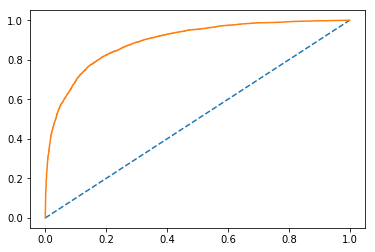

In [44]:
# keep probabilities for the positive outcome only
probs = pred#[:, 1]

# calculate AUC
auc = roc_auc_score(yTest, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)